In [1]:
#Imported Packages:

#Generic
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Data Modeling
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Data Visualization
from scipy.stats import iqr
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data=pd.read_csv('train.csv',index_col='Id',keep_default_na=False,na_values=[" ", "#N/A", "#N/A N/A", "#NA", "-1.#IND", "-1.#QNAN", "-NaN", "-nan", "1.#IND", "1.#QNAN", "<NA>", "N/A", "NULL", "NaN", "n/a", "nan", "null","NA"])
test_data=pd.read_csv('test.csv',index_col='Id',keep_default_na=False,na_values=[" ", "#N/A", "#N/A N/A", "#NA", "-1.#IND", "-1.#QNAN", "-NaN", "-nan", "1.#IND", "1.#QNAN", "<NA>", "N/A", "NULL", "NaN", "n/a", "nan", "null","NA"])
default_NA={'Alley':'NA','BsmtQual':'NA','BsmtCond':'NA','BsmtExposure':'NA','BsmtFinType1':'NA',
                  'BsmtFinType2':'NA','FireplaceQu':'NA','GarageType':'NA','GarageFinish':'NA','GarageQual':'NA',
                  'GarageCond':'NA','PoolQC':'NA','Fence':'NA','MiscFeature':'NA','Exterior2nd':'NA'}
train_data=train_data.fillna(default_NA)
test_data=test_data.fillna(default_NA)

In [3]:
nulls = train_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

LotFrontage 259
MasVnrType 8
MasVnrArea 8
Electrical 1
GarageYrBlt 81


In [4]:
nulls = test_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

MSZoning 4
LotFrontage 227
Utilities 2
Exterior1st 1
MasVnrType 16
MasVnrArea 15
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
GarageYrBlt 78
GarageCars 1
GarageArea 1
SaleType 1


In [5]:
train_data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_data.loc[:, train_data.columns != 'SalePrice'], train_data['SalePrice'],random_state=1,train_size=0.8)
training= pd.concat([X_train, y_train], axis=1)
validation = pd.concat([X_valid, y_valid], axis=1)

In [7]:
Sale_type_common=training.groupby(['Neighborhood'])['SaleType'].agg(pd.Series.mode).reset_index()
def fill_sale_type(df):
    merged_df = pd.merge(df, Sale_type_common, how='left', on=['Neighborhood'])
    merged_df['SaleType_x']=merged_df.apply(lambda row: row['SaleType_y'] if pd.isnull(row['SaleType_x']) else row['SaleType_x'], axis=1)
    merged_df.drop('SaleType_y', axis=1, inplace=True)
    merged_df=merged_df.rename(columns={'SaleType_x': 'SaleType'})
    merged_df.set_index(df.index, inplace=True)
    return merged_df
MSZoning_common=training.groupby(['Neighborhood'])['MSZoning'].agg(pd.Series.mode).reset_index()
def fill_MS_Zoning(df):
    merged_df = pd.merge(df, MSZoning_common, how='left', on=['Neighborhood'])
    merged_df['MSZoning_x']=merged_df.apply(lambda row: row['MSZoning_y'] if pd.isnull(row['MSZoning_x']) else row['MSZoning_x'], axis=1)
    merged_df.drop('MSZoning_y', axis=1, inplace=True)
    merged_df=merged_df.rename(columns={'MSZoning_x': 'MSZoning'})
    merged_df.set_index(df.index, inplace=True)
    return merged_df
lot_frontage_common=training.groupby(['Neighborhood'])['LotFrontage'].median().reset_index()
def fill_lot_frontage(df):
    merged_df = pd.merge(df, lot_frontage_common, how='left', on=['Neighborhood'])
    merged_df['LotFrontage_x']=merged_df.apply(lambda row: row['LotFrontage_y'] if pd.isnull(row['LotFrontage_x']) else row['LotFrontage_x'], axis=1)
    merged_df.drop('LotFrontage_y', axis=1, inplace=True)
    merged_df=merged_df.rename(columns={'LotFrontage_x': 'LotFrontage'})
    merged_df.set_index(df.index, inplace=True)
    return merged_df
MasVnrType_common=training.groupby(['Neighborhood'])['MasVnrType'].agg(pd.Series.mode).reset_index()
def fill_MasVnrType(df):
    merged_df = pd.merge(df, MasVnrType_common, how='left', on=['Neighborhood'])
    merged_df['MasVnrType_x']=merged_df.apply(lambda row: row['MasVnrType_y'] if pd.isnull(row['MasVnrType_x']) else row['MasVnrType_x'], axis=1)
    merged_df.drop('MasVnrType_y', axis=1, inplace=True)
    merged_df=merged_df.rename(columns={'MasVnrType_x': 'MasVnrType'})
    merged_df.set_index(df.index, inplace=True)
    return merged_df
masvnr_neighborhood=training.groupby(['Neighborhood','MasVnrType'])['MasVnrArea'].median().reset_index()
def fill_masvnrarea(df):
    merged_df = pd.merge(df, masvnr_neighborhood, how='left', on=['Neighborhood','MasVnrType'])
    merged_df['MasVnrArea_x']=merged_df.apply(lambda row: row['MasVnrArea_y'] if pd.isnull(row['MasVnrArea_x']) else row['MasVnrArea_x'], axis=1)
    merged_df.drop('MasVnrArea_y', axis=1, inplace=True)
    merged_df=merged_df.rename(columns={'MasVnrArea_x': 'MasVnrArea'})
    merged_df.set_index(df.index, inplace=True)
    return merged_df
GarageYrBlt_common=training.groupby(['Neighborhood','GarageType'])['GarageYrBlt'].median().round().reset_index()
def fill_GarageYrBlt(df):
    merged_df = pd.merge(df, GarageYrBlt_common, how='left', on=['Neighborhood','GarageType'])
    merged_df['GarageYrBlt_x']=merged_df.apply(lambda row: row['GarageYrBlt_y'] if pd.isnull(row['GarageYrBlt_x']) else row['GarageYrBlt_x'], axis=1)
    merged_df.drop('GarageYrBlt_y', axis=1, inplace=True)
    merged_df=merged_df.rename(columns={'GarageYrBlt_x': 'GarageYrBlt'})
    merged_df.set_index(df.index, inplace=True)
    merged_df['GarageYrBlt']=merged_df['GarageYrBlt'].fillna(0)
    return merged_df
def finalize_convert(df):
    df['MSSubClass'] = df['MSSubClass'].apply(str)
    df['OverallQual'] = df['OverallQual'].astype(str)
    df['OverallCond'] = df['OverallCond'].astype(str)
    df['YearRemodAdd']=df['YearRemodAdd'].astype(str)
    df['YearBuilt']=df['YearBuilt'].astype(str)
    df['GarageYrBlt']=df['GarageYrBlt'].astype(str)
    df['YrSold'] = df['YrSold'].astype(str)
    df['MoSold'] = df['MoSold'].astype(str)
    return df
common_electrical=training['Electrical'].mode()[0]
common_masvnrtype=training['MasVnrType'].mode()[0]
common_exterior_1=training['Exterior1st'].mode()[0]
common_exterior_2=training['Exterior2nd'].mode()[0]

In [8]:
# fill null values
training=fill_sale_type(training)
training=fill_MS_Zoning(training)
training=fill_lot_frontage(training)
training.drop('Utilities', axis=1, inplace=True)
training['Electrical']=training['Electrical'].fillna(common_electrical)
training=fill_MasVnrType(training)
training=fill_masvnrarea(training)
#training['MasVnrType']=training['MasVnrType'].fillna(common_masvnrtype)
#training['MasVnrArea']=training['MasVnrArea'].fillna(0)
training['Functional']=training['Functional'].fillna('Typ')
training=fill_GarageYrBlt(training)
training['Exterior1st']=training['Exterior1st'].fillna(common_exterior_1)
training['Exterior2nd']=training['Exterior2nd'].fillna(common_exterior_2)
training['BsmtFinSF1']=training.apply(lambda row: 0 if row['BsmtFinType1']=='NA' and pd.isnull(row['BsmtFinSF1']) else row['BsmtFinSF1'], axis=1)
training['BsmtFinSF2']=training.apply(lambda row: 0 if row['BsmtFinType2']=='NA' and pd.isnull(row['BsmtFinSF2']) else row['BsmtFinSF2'], axis=1)
training['BsmtUnfSF']=training.apply(lambda row: 0 if (row['BsmtFinType1']=='NA' and row['BsmtFinType2']=='NA' and pd.isnull(row['BsmtUnfSF'])) else row['BsmtUnfSF'], axis=1)
training['TotalBsmtSF']=training.apply(lambda row: row['BsmtFinSF1']+row['BsmtFinSF2']+row['BsmtUnfSF'] if pd.isnull(row['TotalBsmtSF']) else row['TotalBsmtSF'] ,axis=1)
training['BsmtFullBath']=training['BsmtFullBath'].fillna(0)
training['BsmtHalfBath']=training['BsmtHalfBath'].fillna(0)
training['KitchenQual']=training['KitchenQual'].fillna('TA')
training['GarageArea']=training['GarageArea'].fillna(0)
training['GarageCars']=training['GarageCars'].fillna(0)
#training['GarageYrBlt'] = training.apply(lambda row: 0 if row['GarageType']=='NA' and pd.isnull(row['GarageYrBlt']) else row['GarageYrBlt'], axis=1)
validation=fill_sale_type(validation)
validation=fill_MS_Zoning(validation)
validation=fill_lot_frontage(validation)
validation.drop('Utilities', axis=1, inplace=True)
validation['Electrical']=validation['Electrical'].fillna(common_electrical)
validation=fill_MasVnrType(validation)
validation=fill_masvnrarea(validation)
# validation['MasVnrType']=validation['MasVnrType'].fillna(common_masvnrtype)
#validation['MasVnrArea']=validation['MasVnrArea'].fillna(0)
validation['Functional']=validation['Functional'].fillna('Typ')
validation=fill_GarageYrBlt(validation)
validation['Exterior1st']=validation['Exterior1st'].fillna(common_exterior_1)
validation['Exterior2nd']=validation['Exterior2nd'].fillna(common_exterior_2)
validation['BsmtFinSF1']=validation.apply(lambda row: 0 if row['BsmtFinType1']=='NA' and pd.isnull(row['BsmtFinSF1']) else row['BsmtFinSF1'], axis=1)
validation['BsmtFinSF2']=validation.apply(lambda row: 0 if row['BsmtFinType2']=='NA' and pd.isnull(row['BsmtFinSF2']) else row['BsmtFinSF2'], axis=1)
validation['BsmtUnfSF']=validation.apply(lambda row: 0 if (row['BsmtFinType1']=='NA' and row['BsmtFinType2']=='NA' and pd.isnull(row['BsmtUnfSF'])) else row['BsmtUnfSF'], axis=1)
validation['TotalBsmtSF']=validation.apply(lambda row: row['BsmtFinSF1']+row['BsmtFinSF2']+row['BsmtUnfSF'] if pd.isnull(row['TotalBsmtSF']) else row['TotalBsmtSF'] ,axis=1)
validation['BsmtFullBath']=validation['BsmtFullBath'].fillna(0)
validation['BsmtHalfBath']=validation['BsmtHalfBath'].fillna(0)
validation['KitchenQual']=validation['KitchenQual'].fillna('TA')
validation['GarageArea']=validation['GarageArea'].fillna(0)
validation['GarageCars']=validation['GarageCars'].fillna(0)
#validation['GarageYrBlt'] = validation.apply(lambda row: 0 if row['GarageType']=='NA' and pd.isnull(row['GarageYrBlt']) else row['GarageYrBlt'], axis=1)
test_data=fill_sale_type(test_data)
test_data=fill_MS_Zoning(test_data)
test_data=fill_lot_frontage(test_data)
test_data.drop('Utilities', axis=1, inplace=True)
test_data['Electrical']=test_data['Electrical'].fillna(common_electrical)
test_data=fill_MasVnrType(test_data)
test_data=fill_masvnrarea(test_data)
# test_data['MasVnrType']=test_data['MasVnrType'].fillna(common_masvnrtype)
#test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(0)
test_data['Functional']=test_data['Functional'].fillna('Typ')
test_data=fill_GarageYrBlt(test_data)
test_data['Exterior1st']=test_data['Exterior1st'].fillna(common_exterior_1)
test_data['Exterior2nd']=test_data['Exterior2nd'].fillna(common_exterior_2)
test_data['BsmtFinSF1']=test_data.apply(lambda row: 0 if row['BsmtFinType1']=='NA' and pd.isnull(row['BsmtFinSF1']) else row['BsmtFinSF1'], axis=1)
test_data['BsmtFinSF2']=test_data.apply(lambda row: 0 if row['BsmtFinType2']=='NA' and pd.isnull(row['BsmtFinSF2']) else row['BsmtFinSF2'], axis=1)
test_data['BsmtUnfSF']=test_data.apply(lambda row: 0 if (row['BsmtFinType1']=='NA' and row['BsmtFinType2']=='NA' and pd.isnull(row['BsmtUnfSF'])) else row['BsmtUnfSF'], axis=1)
test_data['TotalBsmtSF']=test_data.apply(lambda row: row['BsmtFinSF1']+row['BsmtFinSF2']+row['BsmtUnfSF'] if pd.isnull(row['TotalBsmtSF']) else row['TotalBsmtSF'] ,axis=1)
test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna(0)
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(0)
test_data['KitchenQual']=test_data['KitchenQual'].fillna('TA')
test_data['GarageArea']=test_data['GarageArea'].fillna(0)
test_data['GarageCars']=test_data['GarageCars'].fillna(0)

In [9]:
training=finalize_convert(training)
validation=finalize_convert(validation)
test_data=finalize_convert(test_data)

In [10]:
def get_cat_num_features(df):
    num_features = []
    cat_features = []
    for col in df.columns:
        if df[col].dtype=="float64" or df[col].dtype=="int64":
            num_features.append(col)
        else:
            cat_features.append(col)
    return num_features, cat_features

In [11]:
def create_new_features(df):
    df['TotalSF']=df['1stFlrSF']+df['2ndFlrSF']+df['TotalBsmtSF']
    df['Total_Bathrooms'] = (df['FullBath'] + (0.5*df['HalfBath'])+df['BsmtFullBath']+(0.5*df['BsmtHalfBath']))
    df['Bsmt_Baths']=df['BsmtFullBath']+(0.5*df['BsmtHalfBath'])
    df['Total_BathAbvGrd']=df['FullBath']+(0.5*df['HalfBath'])
    df["AvgRoomSize"] = df["GrLivArea"] / (df["TotRmsAbvGrd"]+(0.4*df['Total_BathAbvGrd']))
    df['Total_porch_sf'] = (df['OpenPorchSF']+df['3SsnPorch']+df['EnclosedPorch'] + df['ScreenPorch']+df['WoodDeckSF'])
    df['BedBath']=df['BedroomAbvGr']*df['Total_BathAbvGrd']
    df['TotalLot']=df['LotFrontage']+df['LotArea']
    df['sqft_living']=df['TotalBsmtSF']+df['GrLivArea']
    #df=df.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','1stFlrSF','WoodDeckSF','BedroomAbvGr'])
    return df
def set_age(df):
    tem=np.where(df['YrSold'].astype(float)>df['GarageYrBlt'].astype(float),df['YrSold'].astype(float),np.where(df['GarageYrBlt'].astype(float)>df['YearRemodAdd'].astype(float),df['GarageYrBlt'].astype(float),df['YearRemodAdd'].astype(float)))
    df['age']=tem-df['YearBuilt'].astype(float)
    df['age']=df['age'].astype('int64')
    df=df.drop(columns=['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold'])
    return df

In [12]:
training=create_new_features(training)
training=set_age(training)
validation=create_new_features(validation)
validation=set_age(validation)
test_data=create_new_features(test_data)
test_data=set_age(test_data)
num_feat,cat_feat=get_cat_num_features(training.loc[:,training.columns!='SalePrice'])
num_feat

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'TotalSF',
 'Total_Bathrooms',
 'Bsmt_Baths',
 'Total_BathAbvGrd',
 'AvgRoomSize',
 'Total_porch_sf',
 'BedBath',
 'TotalLot',
 'sqft_living',
 'age']

In [13]:
#ordinal categories
od_num=['OverallQual','OverallCond','MoSold']
od_cat=['LotShape','LandContour','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond',
    'BsmtExposure','BsmtFinType1', 'BsmtFinType2','HeatingQC','KitchenQual','Functional',
    'FireplaceQu','GarageFinish','GarageQual', 'GarageCond', 'PavedDrive','PoolQC']
bc=['CentralAir']
#nominal categories
nc=['MSSubClass','MSZoning','Street','Alley','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
    'RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType','Foundation','Heating','Electrical','GarageType','Fence','MiscFeature',
    'SaleType','SaleCondition']
def format_table(train,valid,test):
    data= pd.concat([train,valid,test], axis=0)
    electical_map = {'Y': 1, 'N': 0}
    data[bc[0]]=data[bc[0]].map(electical_map)
    data=pd.get_dummies(data,columns=nc)
    new_train=data.loc[train.index,]
    new_valid=data.loc[valid.index,]
    new_test=data.loc[test.index,]
    return new_train,new_valid,new_test
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def encode_data(train,valid,test):
    data= pd.concat([train,valid,test], axis=0)
    data[od_num]=data[od_num].astype(int)
    data[od_cat]=data[od_cat].apply(le.fit_transform)
    new_train=data.loc[train.index,]
    new_valid=data.loc[valid.index,]
    new_test=data.loc[test.index,]
    return new_train,new_valid,new_test.drop('SalePrice',axis=1)
training,validation,test_data=format_table(training,validation,test_data)
training,validation,test_data=encode_data(training,validation,test_data)

training.reset_index().to_csv('training_eda.csv',index=False)
validation.reset_index().to_csv('validation_eda.csv',index=False)
test_data.reset_index().to_csv('test_eda.csv',index=False)

Skewness: 2.4621383371024117
count    1168.000000
mean       70.329195
std        22.893417
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


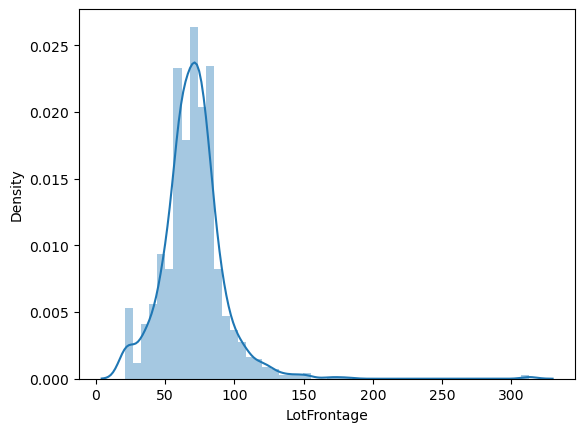

Skewness: 12.397355223058842
count      1168.000000
mean      10542.357877
std        9875.947661
min        1300.000000
25%        7500.000000
50%        9501.500000
75%       11621.750000
max      215245.000000
Name: LotArea, dtype: float64


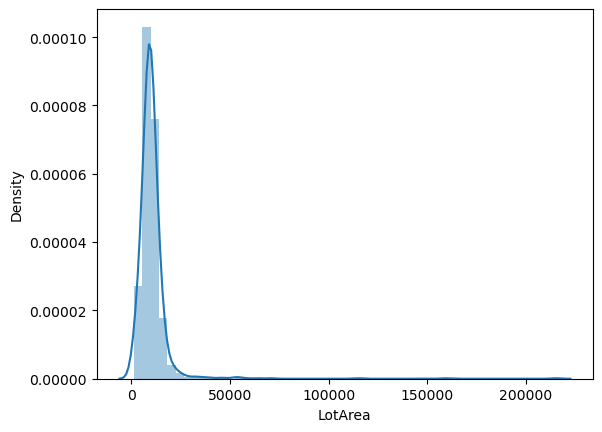

Skewness: 2.591947028542769
count    1168.000000
mean      104.614726
std       177.701840
min         0.000000
25%         0.000000
50%         0.000000
75%       170.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


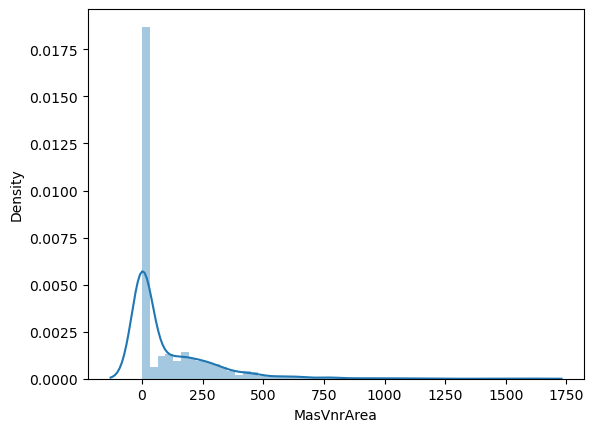

Skewness: 1.8171624282401262
count    1168.000000
mean      452.736301
std       463.541117
min         0.000000
25%         0.000000
50%       398.500000
75%       728.750000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


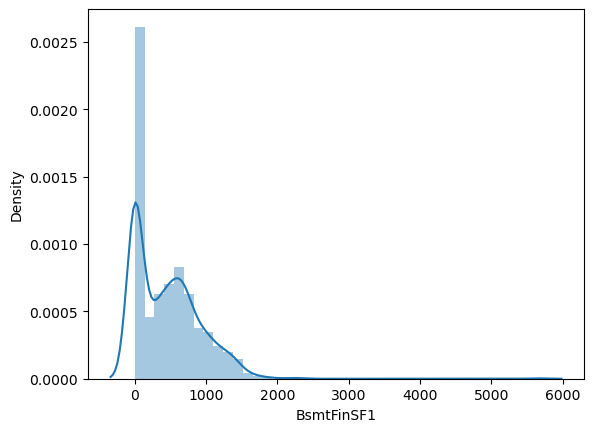

Skewness: 4.418298341491956
count    1168.000000
mean       44.667808
std       161.909961
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


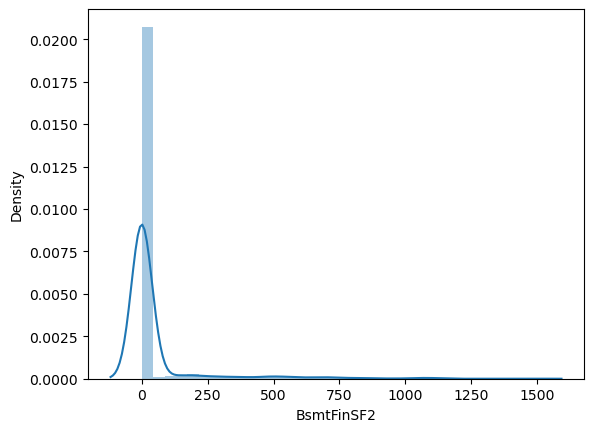

Skewness: 0.9156195058189517
count    1168.000000
mean      572.617295
std       448.642738
min         0.000000
25%       223.750000
50%       484.000000
75%       815.250000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


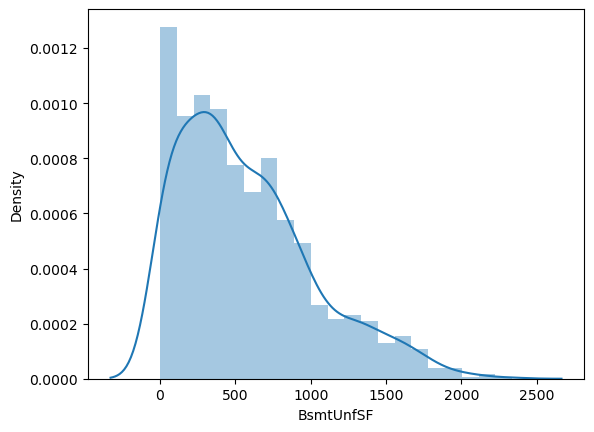

Skewness: 1.6796972409452224
count    1168.000000
mean     1070.021404
std       448.141915
min         0.000000
25%       804.000000
50%      1007.500000
75%      1314.500000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


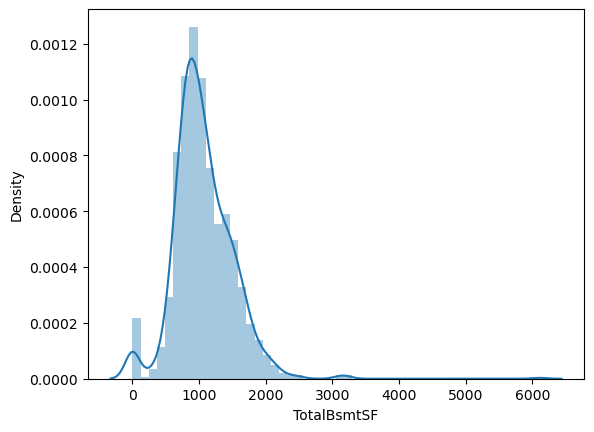

Skewness: 1.4202211026225808
count    1168.000000
mean     1176.254281
std       395.462440
min       334.000000
25%       888.000000
50%      1098.500000
75%      1422.000000
max      4692.000000
Name: 1stFlrSF, dtype: float64


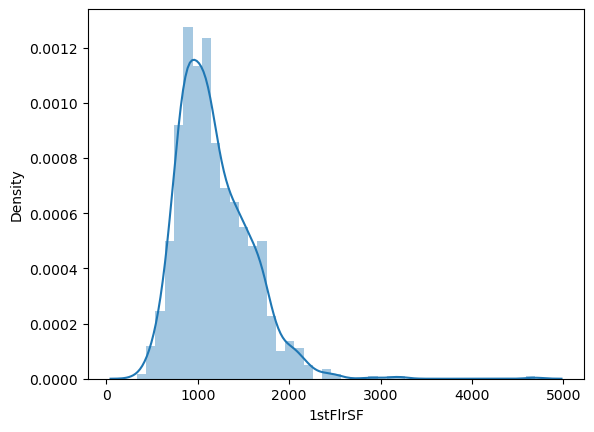

Skewness: 0.806232127721198
count    1168.000000
mean      340.278253
std       434.272050
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      1872.000000
Name: 2ndFlrSF, dtype: float64


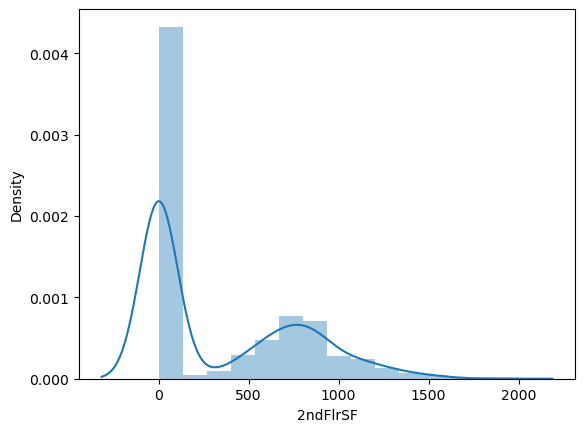

Skewness: 9.862965922072567
count    1168.000000
mean        5.094178
std        45.317916
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


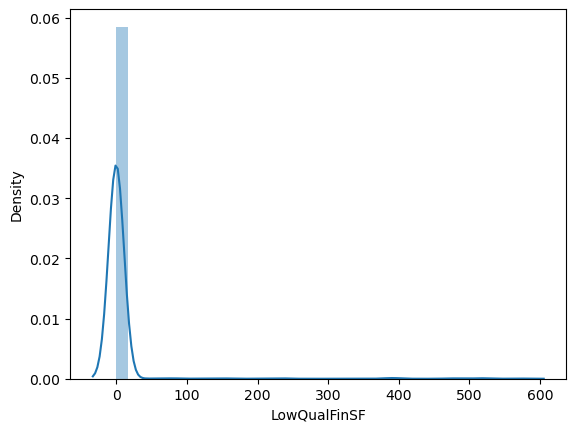

Skewness: 1.3530075939462674
count    1168.000000
mean     1521.626712
std       523.534530
min       334.000000
25%      1133.500000
50%      1470.000000
75%      1790.000000
max      5642.000000
Name: GrLivArea, dtype: float64


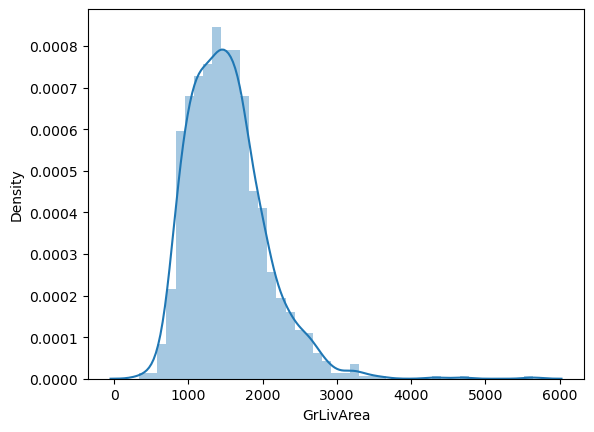

Skewness: 0.5600035678088299
count    1168.000000
mean        0.437500
std         0.521547
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


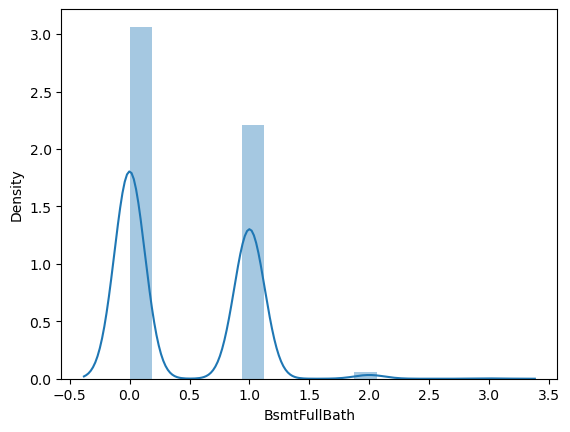

Skewness: 3.9314205648864204
count    1168.000000
mean        0.059075
std         0.239472
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


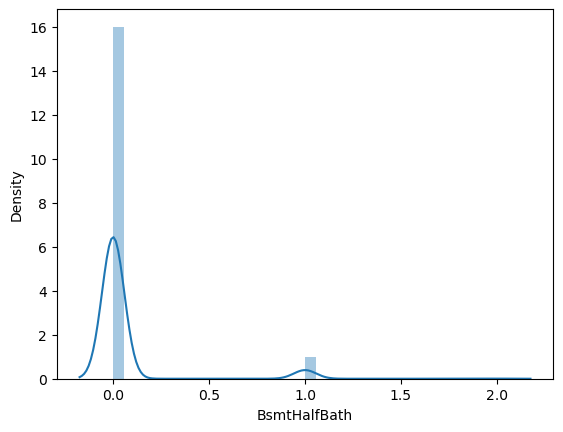

Skewness: 0.044772220896532405
count    1168.000000
mean        1.571918
std         0.546045
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


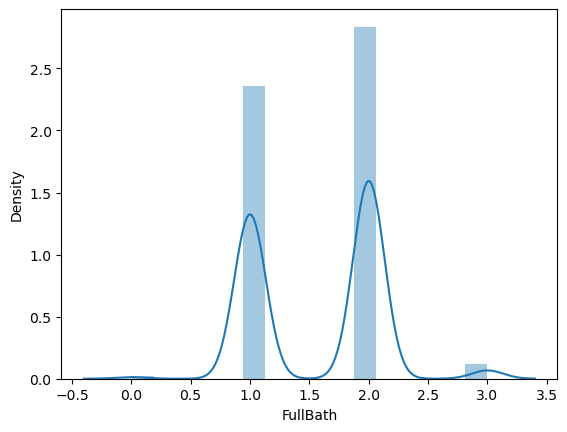

Skewness: 0.7138288142735408
count    1168.000000
mean        0.380137
std         0.504665
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


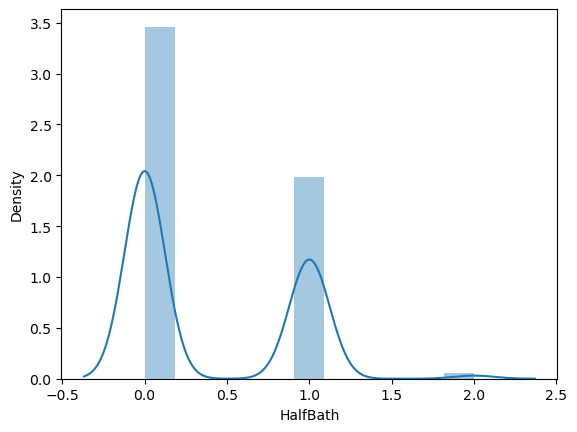

Skewness: 0.2577288704691379
count    1168.000000
mean        2.872432
std         0.818589
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


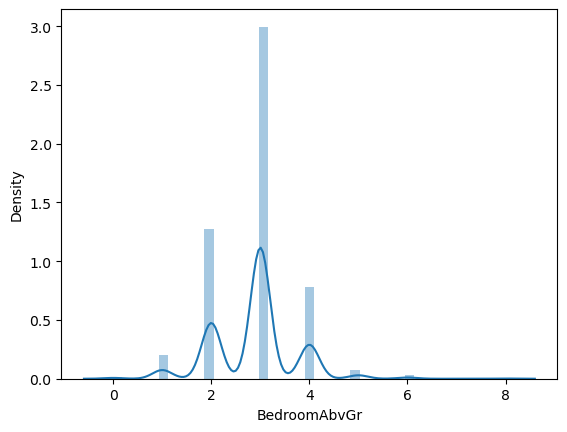

Skewness: 3.948206237084816
count    1168.000000
mean        1.048801
std         0.219484
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: KitchenAbvGr, dtype: float64


Skewness: 0.6781048307187435
count    1168.000000
mean        6.548801
std         1.626478
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


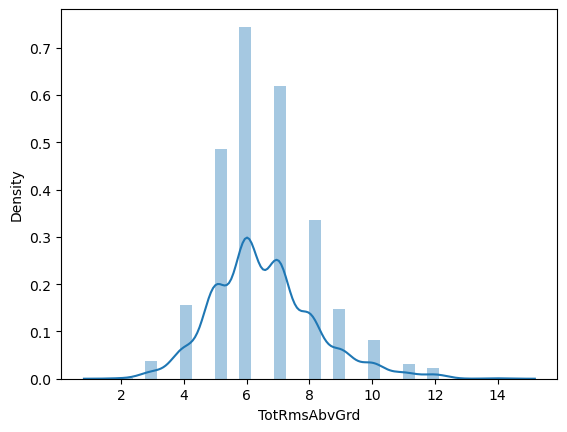

Skewness: 0.6423100558898825
count    1168.000000
mean        0.619863
std         0.648787
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


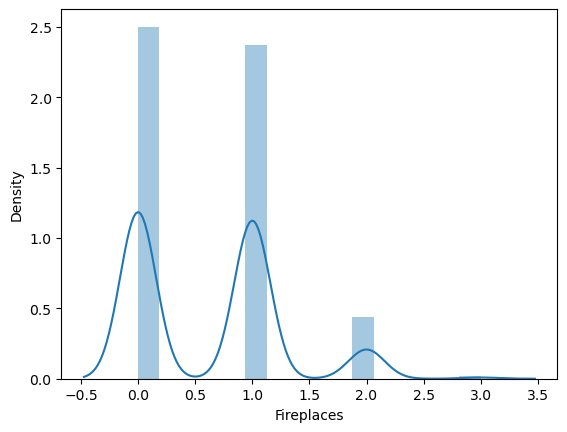

Skewness: -0.35994233040095913
count    1168.000000
mean        1.774829
std         0.734614
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


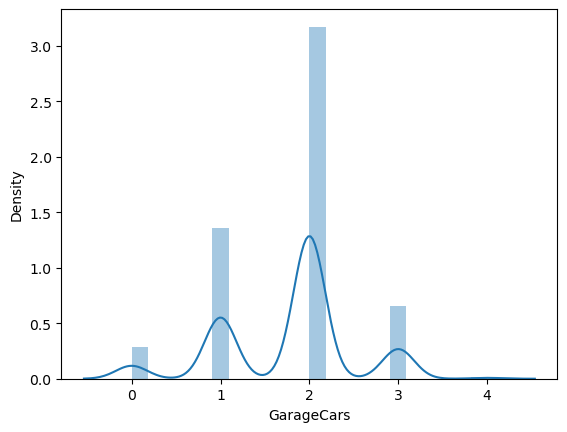

Skewness: 0.1667359145144407
count    1168.000000
mean      474.120719
std       210.856384
min         0.000000
25%       336.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


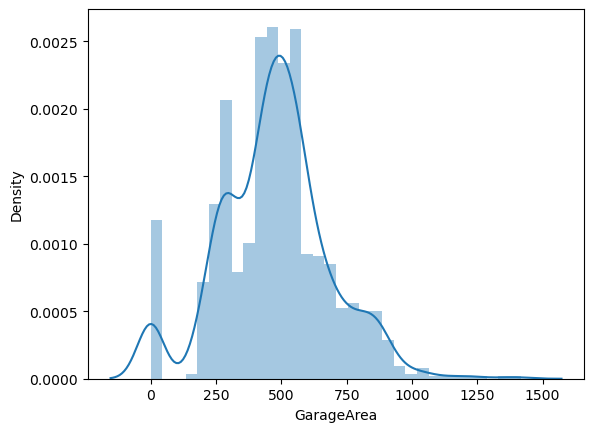

Skewness: 1.3277802889051675
count    1168.000000
mean       94.656678
std       122.161984
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       736.000000
Name: WoodDeckSF, dtype: float64


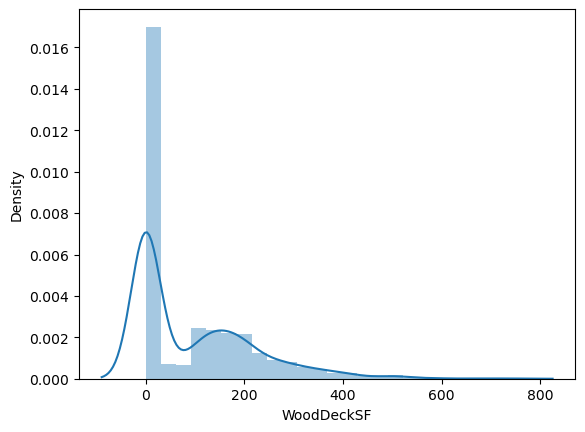

Skewness: 2.46507197601149
count    1168.000000
mean       47.315925
std        67.699475
min         0.000000
25%         0.000000
50%        27.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64


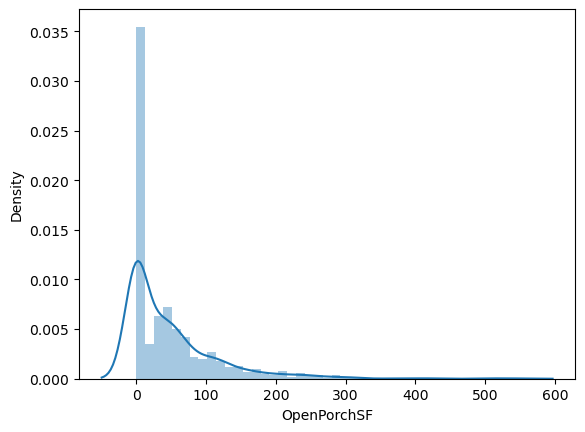

Skewness: 3.0866308039086525
count    1168.000000
mean       22.753425
std        62.710765
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


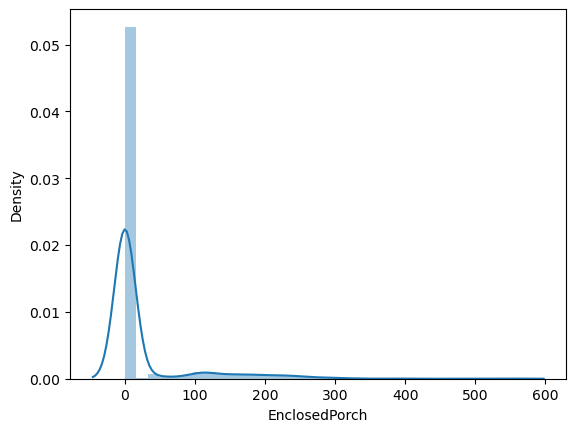

Skewness: 10.101922965649468
count    1168.000000
mean        3.654110
std        31.103419
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


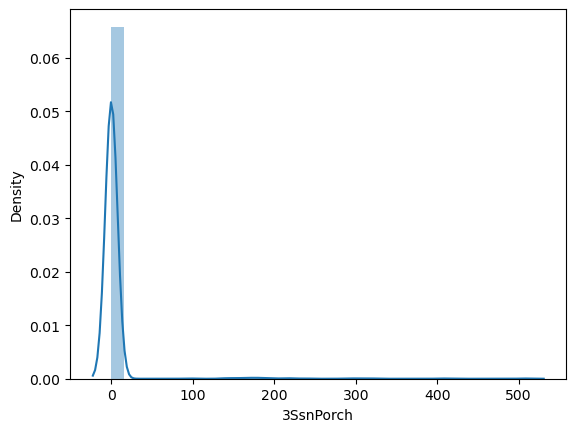

Skewness: 3.9867324637430057
count    1168.000000
mean       16.113870
std        57.769137
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


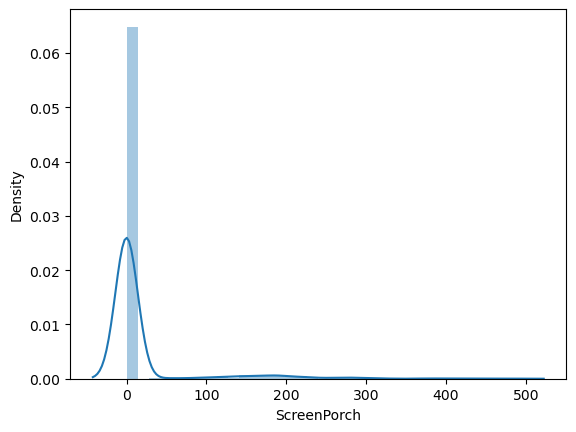

Skewness: 15.859557242801852
count    1168.000000
mean        2.418664
std        37.390139
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


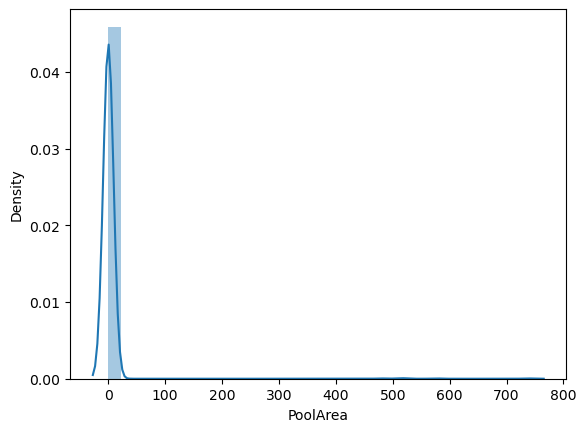

Skewness: 22.18328556234878
count     1168.000000
mean        49.948630
std        551.953605
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


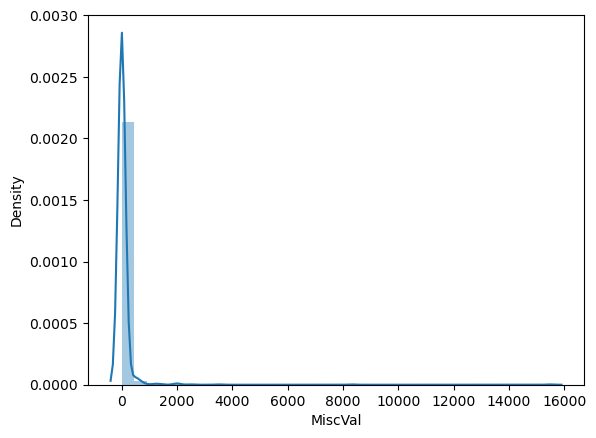

Skewness: 1.8963846496840784
count     1168.000000
mean      2586.553938
std        827.681331
min        334.000000
25%       2036.000000
50%       2495.000000
75%       3044.250000
max      11752.000000
Name: TotalSF, dtype: float64


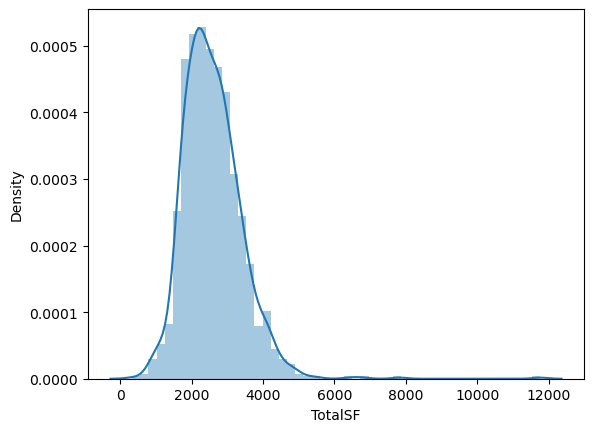

Skewness: 0.2681817027313006
count    1168.000000
mean        2.229024
std         0.787099
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Total_Bathrooms, dtype: float64


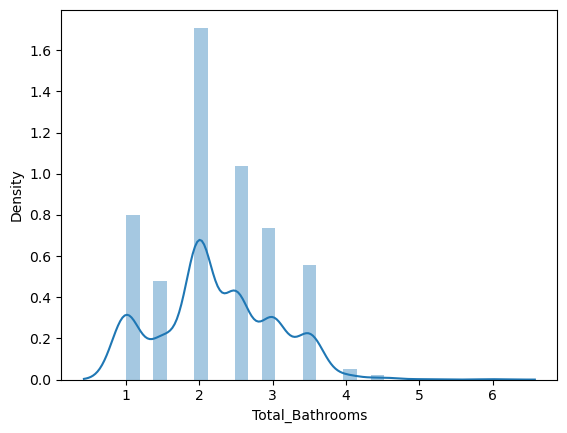

Skewness: 0.48308713843112117
count    1168.000000
mean        0.467038
std         0.516216
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: Bsmt_Baths, dtype: float64


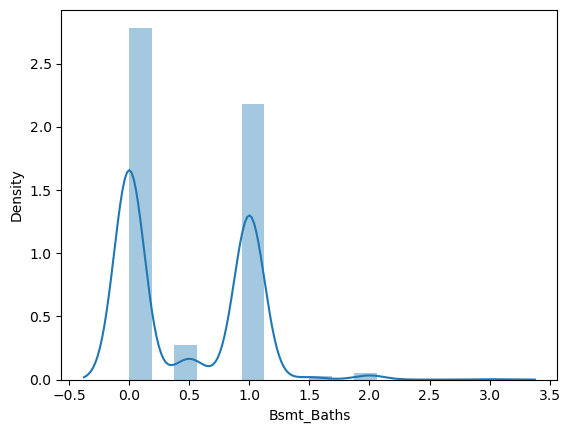

Skewness: 0.12671784376104375
count    1168.000000
mean        1.761986
std         0.630782
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.500000
Name: Total_BathAbvGrd, dtype: float64


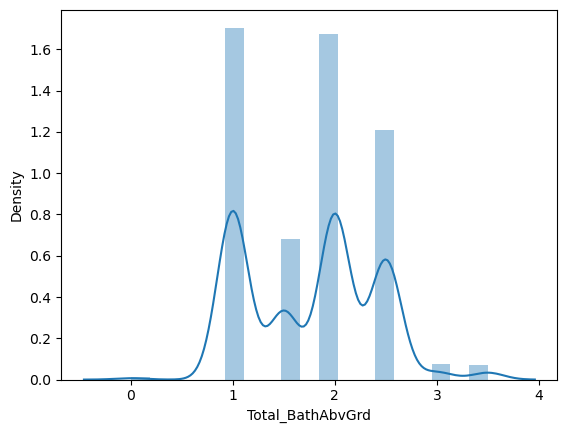

Skewness: 0.8826039337855185
count    1168.000000
mean      207.860065
std        37.665418
min       118.181818
25%       181.444444
50%       204.250842
75%       228.690972
max       434.000000
Name: AvgRoomSize, dtype: float64


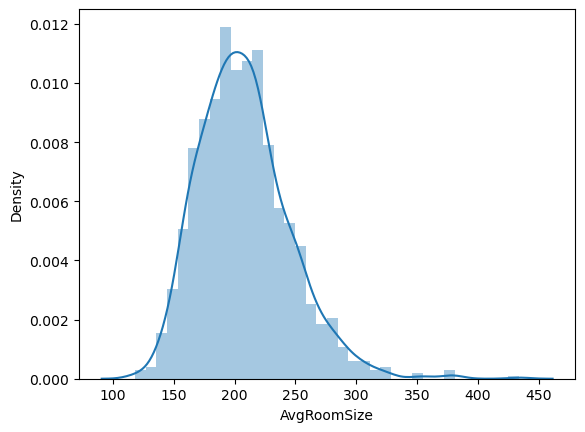

Skewness: 1.0247206533227886
count    1168.000000
mean      184.494007
std       156.100680
min         0.000000
25%        49.000000
50%       168.000000
75%       272.000000
max      1027.000000
Name: Total_porch_sf, dtype: float64


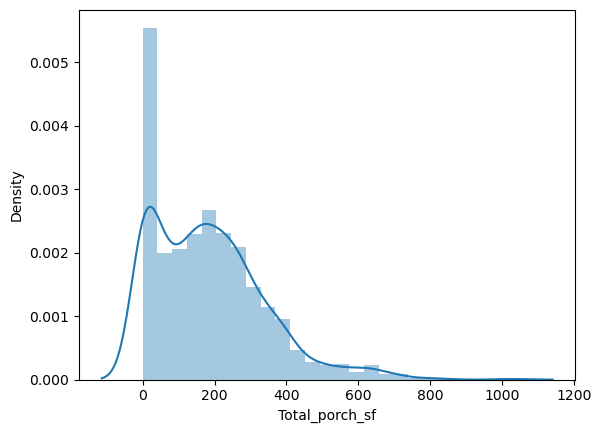

Skewness: 0.8201067500864747
count    1168.000000
mean        5.269692
std         2.803100
min         0.000000
25%         3.000000
50%         4.500000
75%         7.500000
max        18.000000
Name: BedBath, dtype: float64


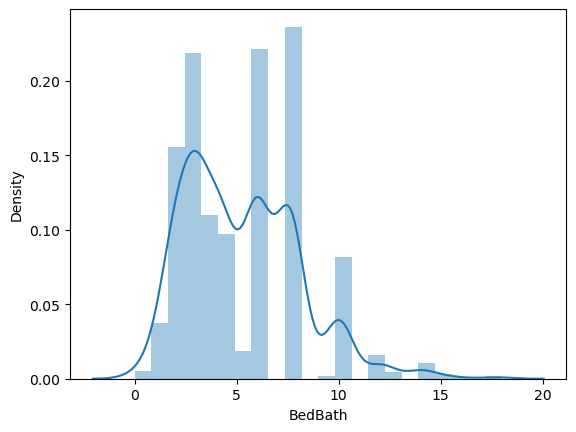

Skewness: 12.37899171381611
count      1168.000000
mean      10612.687072
std        9883.938809
min        1324.000000
25%        7575.000000
50%        9576.000000
75%       11696.375000
max      215395.000000
Name: TotalLot, dtype: float64


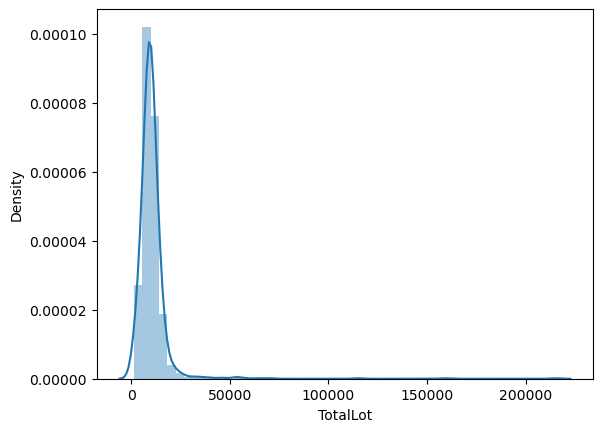

Skewness: 1.896770590336246
count     1168.000000
mean      2591.648116
std        829.613902
min        334.000000
25%       2038.750000
50%       2496.000000
75%       3045.250000
max      11752.000000
Name: sqft_living, dtype: float64


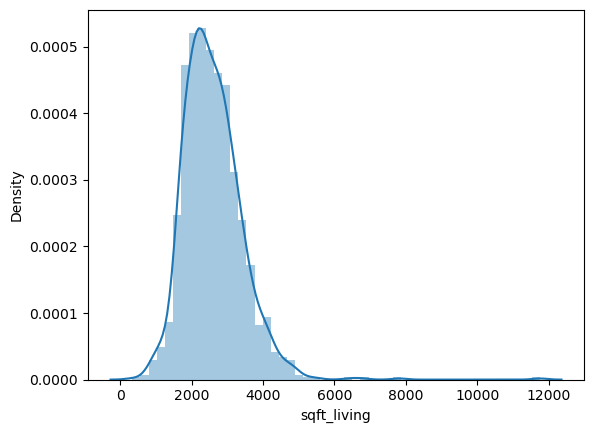

Skewness: 0.6288829982080021
count    1168.000000
mean       36.067637
std        30.325592
min         0.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: age, dtype: float64


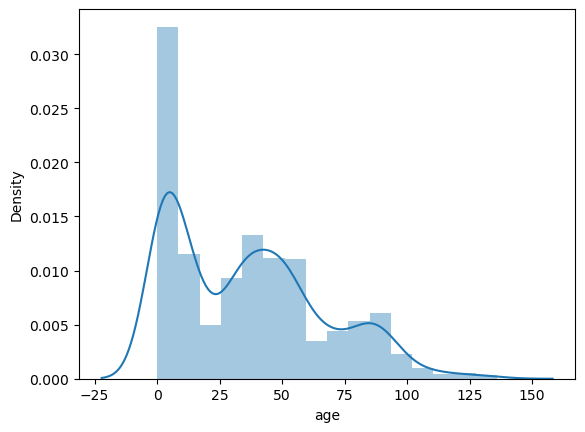

In [14]:
for col in num_feat:
    plt.tight_layout()
    sns.distplot(training[col])
    print("Skewness: "+str(training[col].skew()))
    print(training[col].describe())
    plt.show()

Skewness: 0.1913637507970349
count    1168.000000
mean        6.134418
std         1.369861
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


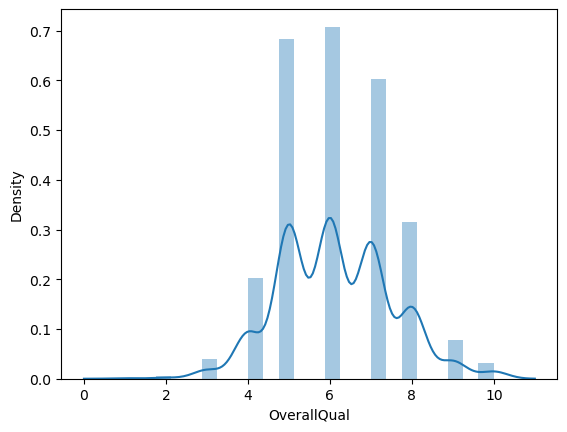

Skewness: 0.7687460244467823
count    1168.000000
mean        5.596747
std         1.111237
min         2.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64


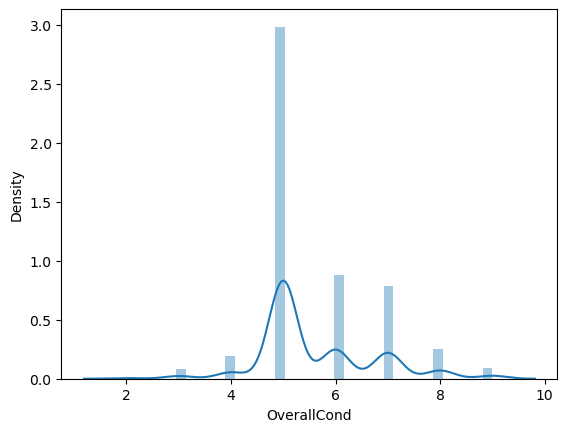

Skewness: 0.22818594996835914
count    1168.000000
mean        6.291096
std         2.689124
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64


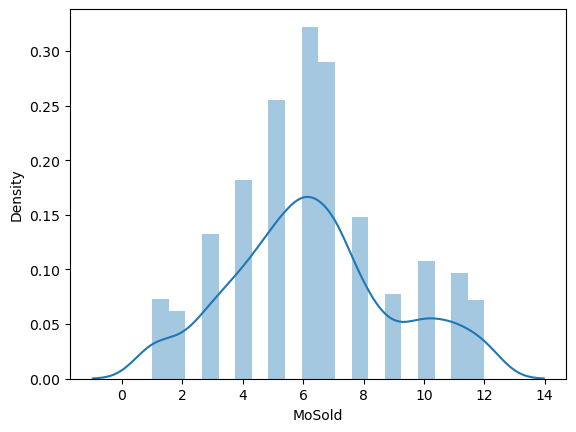

Skewness: -0.5563886645347321
count    1168.000000
mean        1.907534
std         1.419660
min         0.000000
25%         0.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: LotShape, dtype: float64


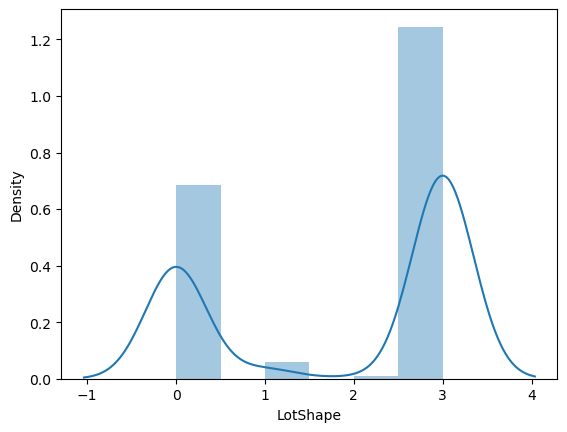

Skewness: -3.200784939445386
count    1168.000000
mean        2.779110
std         0.710438
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: LandContour, dtype: float64


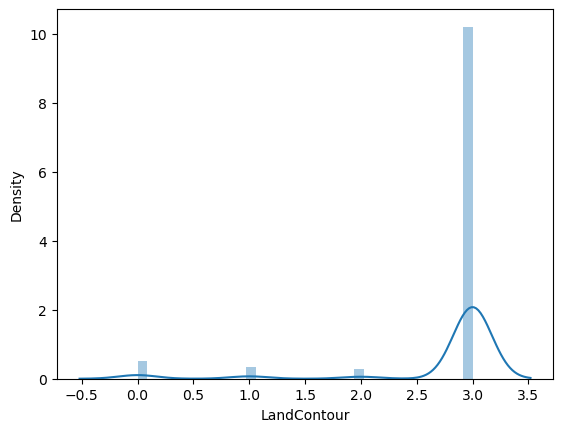

Skewness: 4.967502227322793
count    1168.000000
mean        0.056507
std         0.258979
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: LandSlope, dtype: float64


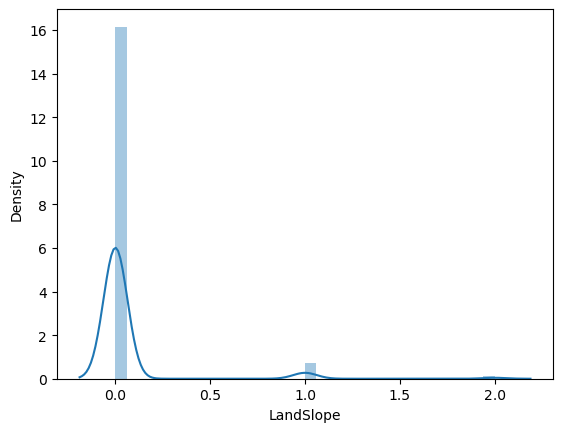

Skewness: -1.7943972988525658
count    1168.000000
mean        2.528253
std         0.692144
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: ExterQual, dtype: float64


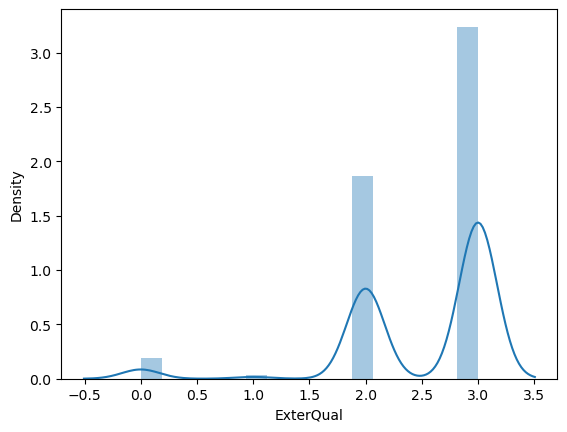

Skewness: -2.576726205792078
count    1168.000000
mean        3.738014
std         0.720511
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: ExterCond, dtype: float64


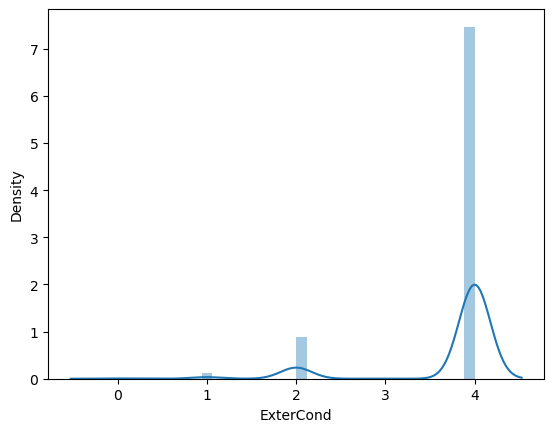

Skewness: -0.46118934909067105
count    1168.000000
mean        2.714041
std         1.261278
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         4.000000
Name: BsmtQual, dtype: float64


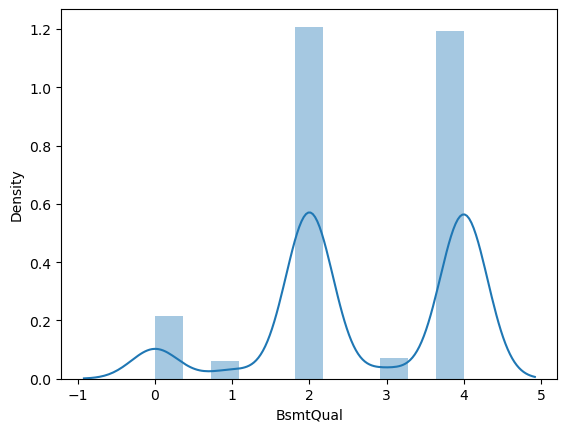

Skewness: -2.920417352686143
count    1168.000000
mean        3.689212
std         0.950436
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: BsmtCond, dtype: float64


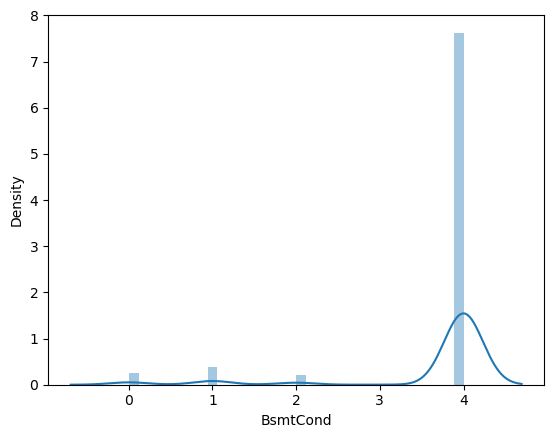

Skewness: -0.917775284804224
count    1168.000000
mean        2.889555
std         1.587427
min         0.000000
25%         1.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: BsmtExposure, dtype: float64


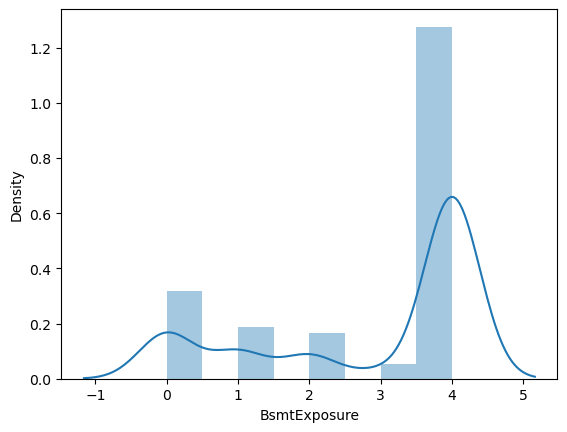

Skewness: 0.13717722075581987
count    1168.000000
mean        3.123288
std         2.243193
min         0.000000
25%         1.750000
50%         2.000000
75%         6.000000
max         6.000000
Name: BsmtFinType1, dtype: float64


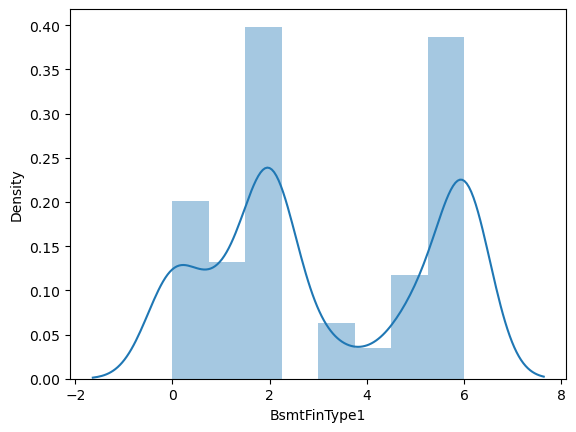

Skewness: -3.406034764598996
count    1168.000000
mean        5.621575
std         1.152002
min         0.000000
25%         6.000000
50%         6.000000
75%         6.000000
max         6.000000
Name: BsmtFinType2, dtype: float64


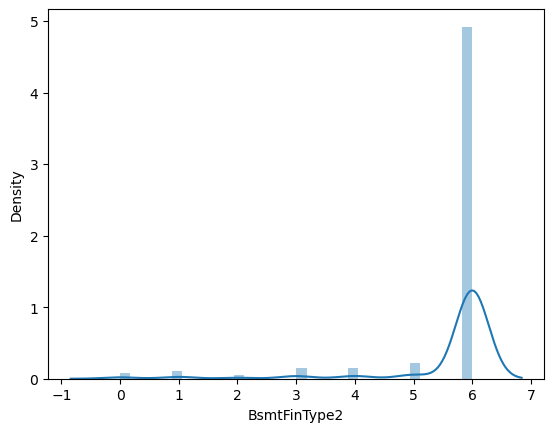

Skewness: 0.5032785107486933
count    1168.000000
mean        1.520548
std         1.747935
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max         4.000000
Name: HeatingQC, dtype: float64


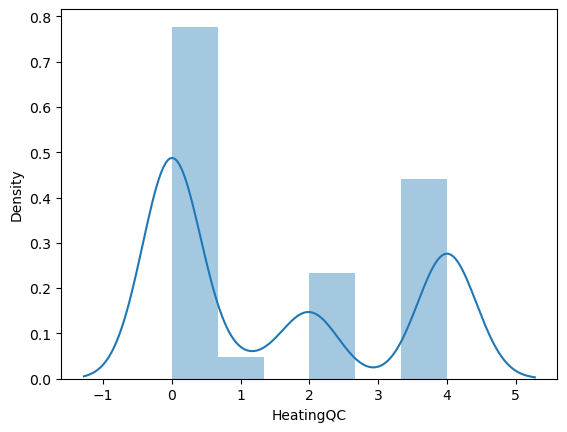

Skewness: -1.4146002728319769
count    1168.000000
mean        2.329623
std         0.826974
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: KitchenQual, dtype: float64


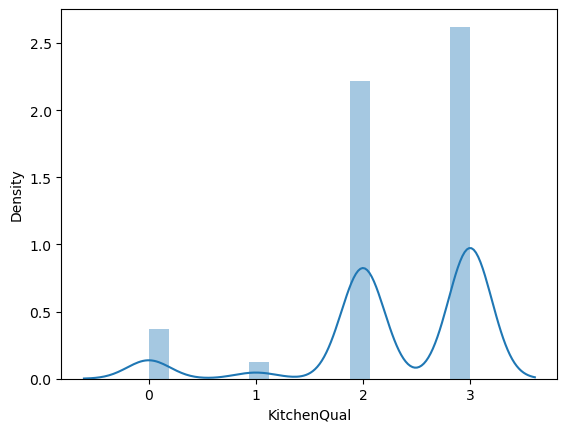

Skewness: -4.2213432339884704
count    1168.000000
mean        5.769692
std         0.926172
min         0.000000
25%         6.000000
50%         6.000000
75%         6.000000
max         6.000000
Name: Functional, dtype: float64


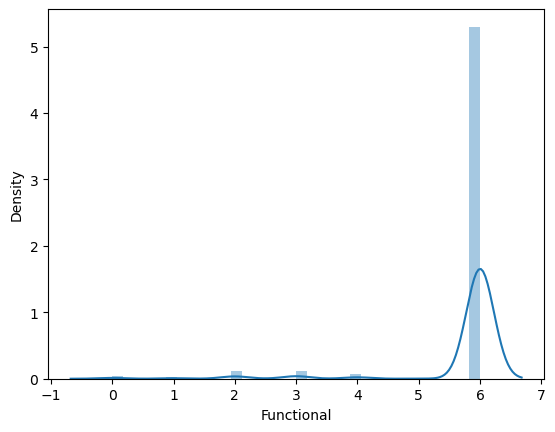

Skewness: 0.3108849260310347
count    1168.000000
mean        3.071918
std         1.169433
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: FireplaceQu, dtype: float64


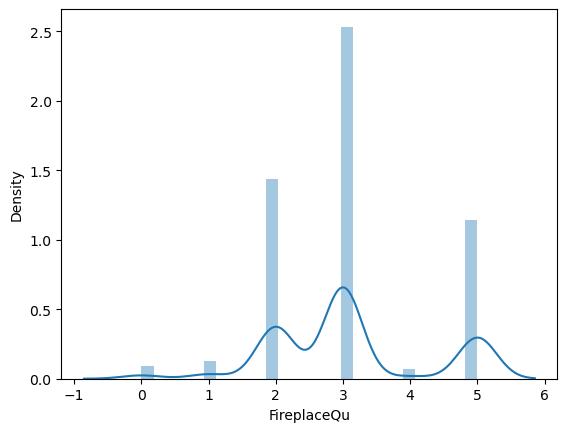

Skewness: -0.6077651864958665
count    1168.000000
mean        1.862158
std         1.186473
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: GarageFinish, dtype: float64


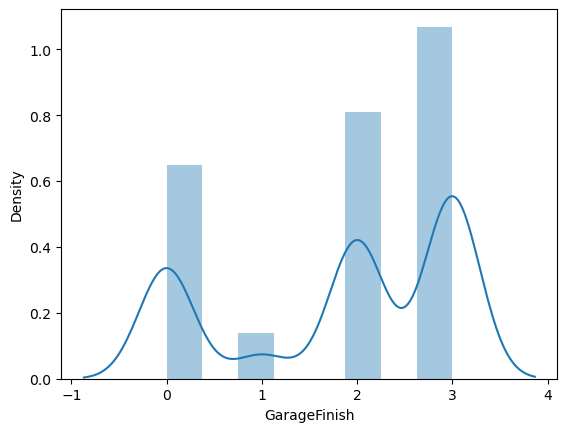

Skewness: -3.2317075777098654
count    1168.000000
mean        4.714041
std         0.906271
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: GarageQual, dtype: float64


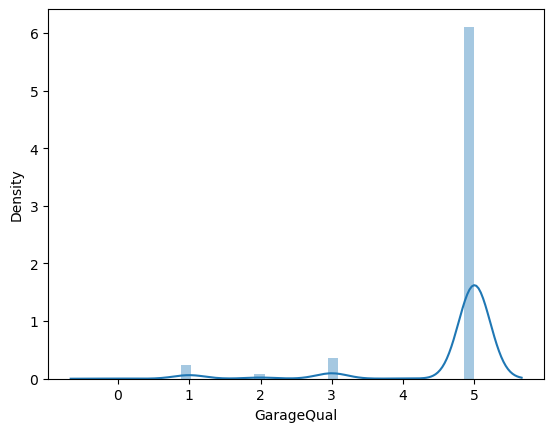

Skewness: -3.602124188093736
count    1168.000000
mean        4.767123
std         0.796661
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: GarageCond, dtype: float64


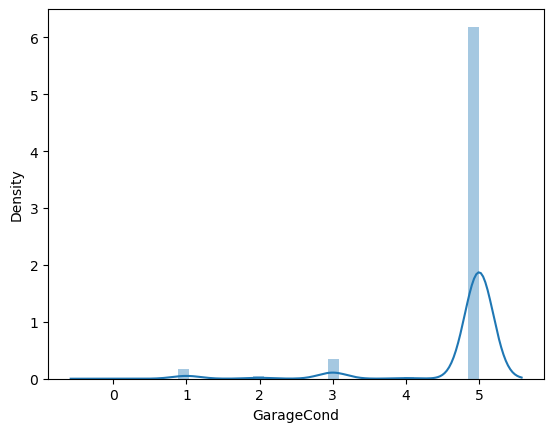

Skewness: -3.32135623442043
count    1168.000000
mean        1.857021
std         0.494288
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: PavedDrive, dtype: float64


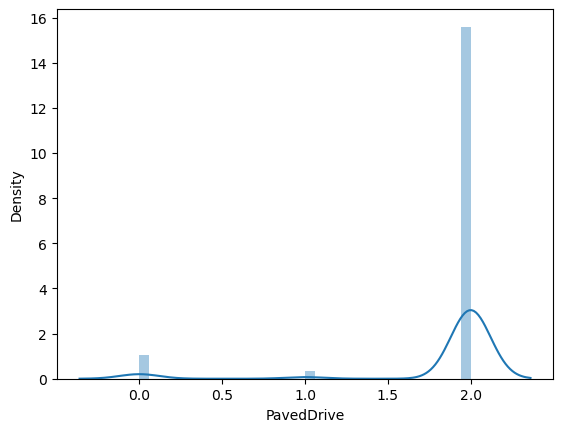

Skewness: -20.24664309046864
count    1168.000000
mean        2.993151
std         0.116891
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: PoolQC, dtype: float64


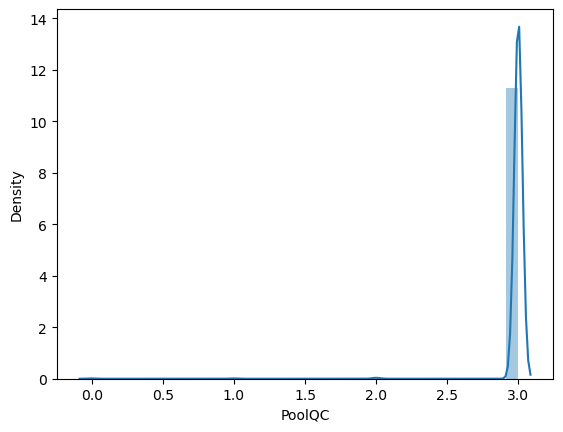

In [15]:
for col in od_num+od_cat:
    plt.tight_layout()
    sns.distplot(training[col])
    print("Skewness: "+str(training[col].skew()))
    print(training[col].describe())
    plt.show()

In [16]:
def transform_col(df):
    df['MasVnrArea']=np.log(df['MasVnrArea']+1)
    df['BsmtFinSF1']=np.log(df['BsmtFinSF1']+1)
    df['1stFlrSF']=np.log(df['1stFlrSF']+1)
    df['GrLivArea']=np.log(df['GrLivArea'])
    df['TotalLot']=np.log(df['TotalLot'])
    df['sqft_living']=np.log(df['sqft_living'])
    df['BsmtFinType2']=np.log(df['BsmtFinType2']+1)
    df['KitchenQual']=np.log(df['KitchenQual']+1)
    df['EnclosedPorch']=np.log(df['EnclosedPorch']+1)
    df['ScreenPorch']=np.log(df['ScreenPorch']+1)
    df['3SsnPorch']=np.log(df['3SsnPorch']+1)
    #df['Total_porch_sf']=np.sqrt(df['Total_porch_sf'])
#     df['ExterQual']=np.log10(df['ExterQual']+1)
#     df['ExterCond']=np.log10(df['ExterCond']+1)
    return df
training=transform_col(training)
validation=transform_col(validation)
test_data=transform_col(test_data)

Skewness: 2.4621383371024117
count    1168.000000
mean       70.329195
std        22.893417
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


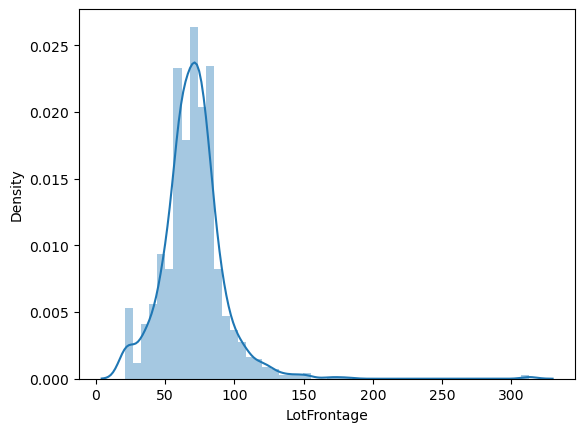

Skewness: 12.397355223058842
count      1168.000000
mean      10542.357877
std        9875.947661
min        1300.000000
25%        7500.000000
50%        9501.500000
75%       11621.750000
max      215245.000000
Name: LotArea, dtype: float64


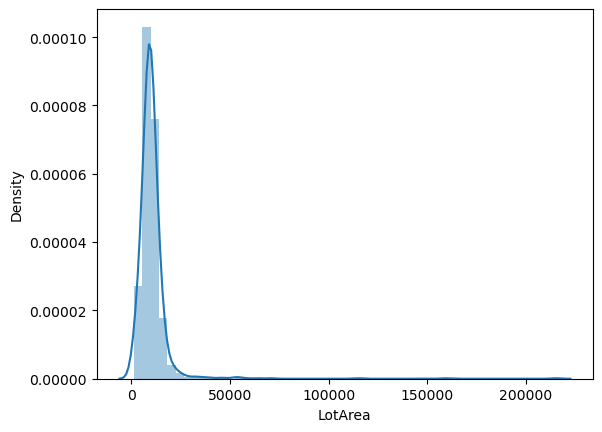

Skewness: 0.45481367333930606
count    1168.000000
mean        2.178103
std         2.639009
min         0.000000
25%         0.000000
50%         0.000000
75%         5.141664
max         7.378384
Name: MasVnrArea, dtype: float64


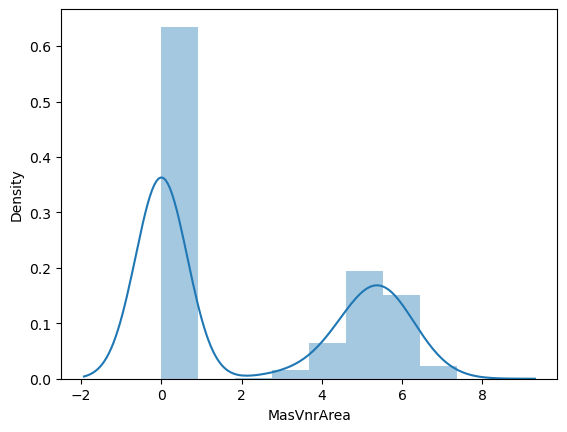

Skewness: -0.6358466823110941
count    1168.000000
mean        4.264079
std         2.991403
min         0.000000
25%         0.000000
50%         5.990213
75%         6.592700
max         8.638525
Name: BsmtFinSF1, dtype: float64


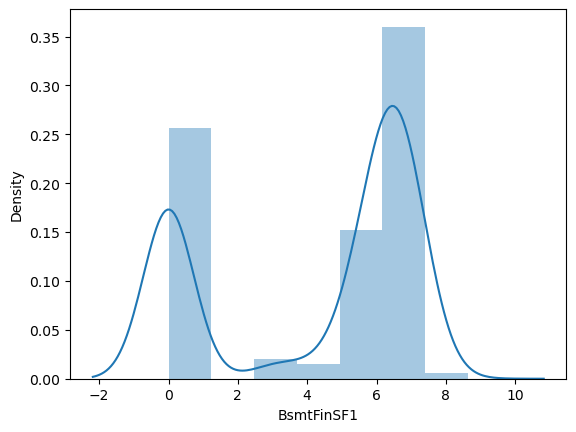

Skewness: 4.418298341491956
count    1168.000000
mean       44.667808
std       161.909961
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


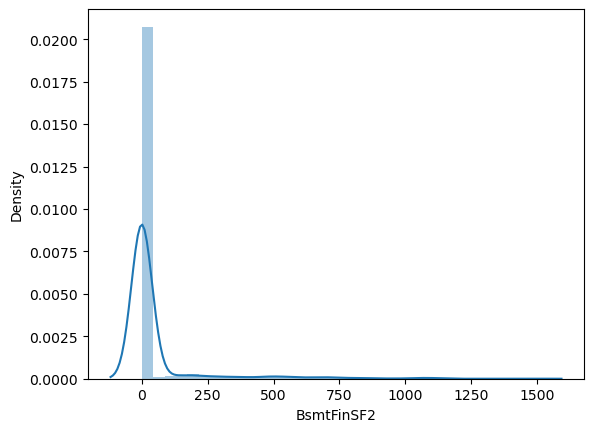

Skewness: 0.9156195058189517
count    1168.000000
mean      572.617295
std       448.642738
min         0.000000
25%       223.750000
50%       484.000000
75%       815.250000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


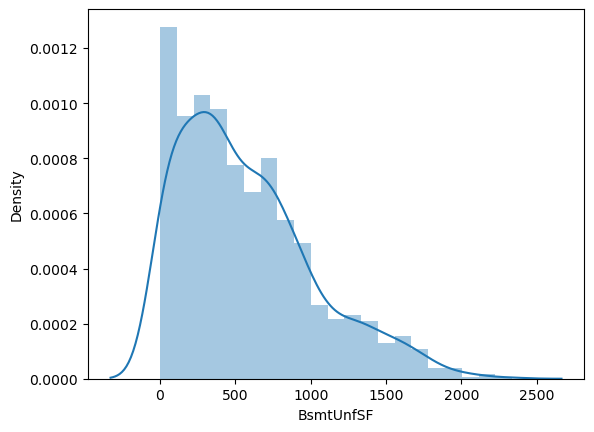

Skewness: 1.6796972409452224
count    1168.000000
mean     1070.021404
std       448.141915
min         0.000000
25%       804.000000
50%      1007.500000
75%      1314.500000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


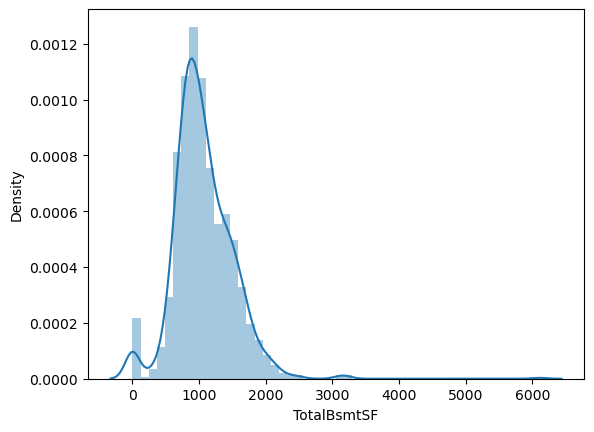

Skewness: 0.0446296285820502
count    1168.000000
mean        7.018918
std         0.321590
min         5.814131
25%         6.790097
50%         7.002611
75%         7.260523
max         8.453827
Name: 1stFlrSF, dtype: float64


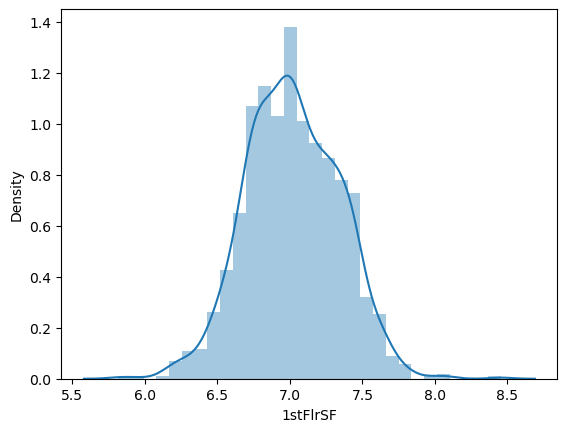

Skewness: 0.806232127721198
count    1168.000000
mean      340.278253
std       434.272050
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      1872.000000
Name: 2ndFlrSF, dtype: float64


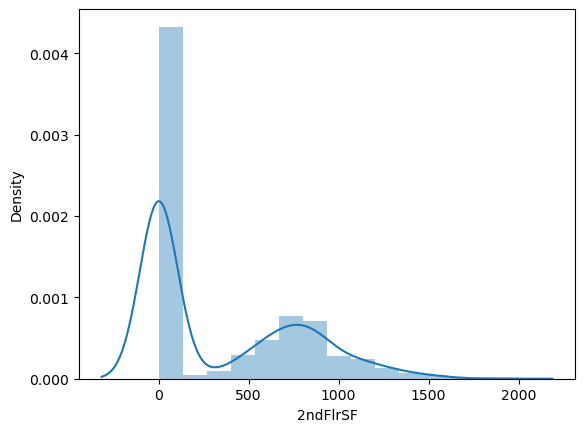

Skewness: 9.862965922072567
count    1168.000000
mean        5.094178
std        45.317916
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


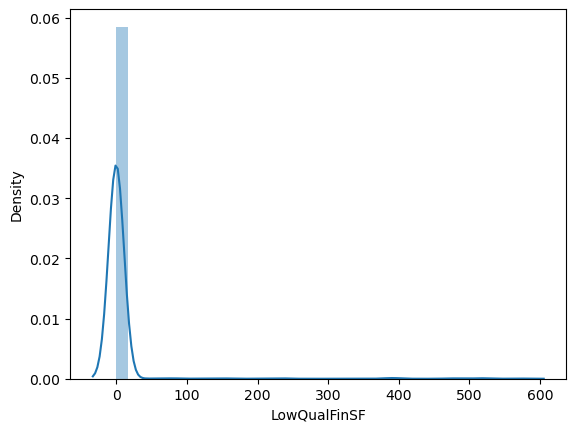

Skewness: -0.053448319803682226
count    1168.000000
mean        7.272318
std         0.332859
min         5.811141
25%         7.033065
50%         7.293018
75%         7.489971
max         8.637994
Name: GrLivArea, dtype: float64


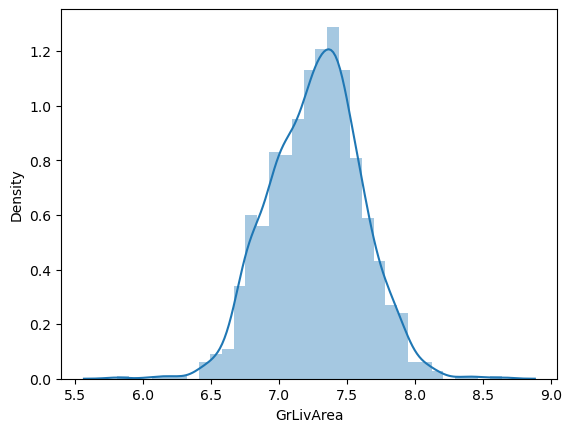

Skewness: 0.5600035678088299
count    1168.000000
mean        0.437500
std         0.521547
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


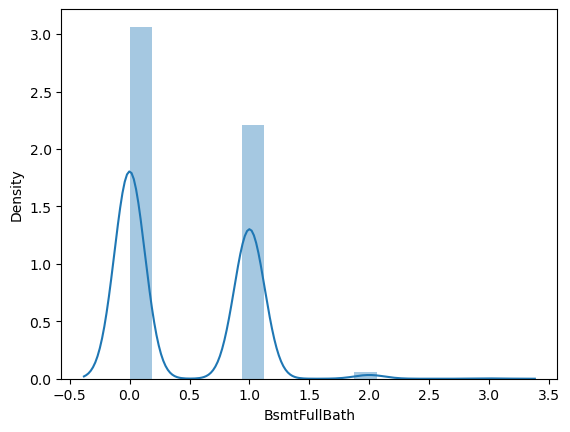

Skewness: 3.9314205648864204
count    1168.000000
mean        0.059075
std         0.239472
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


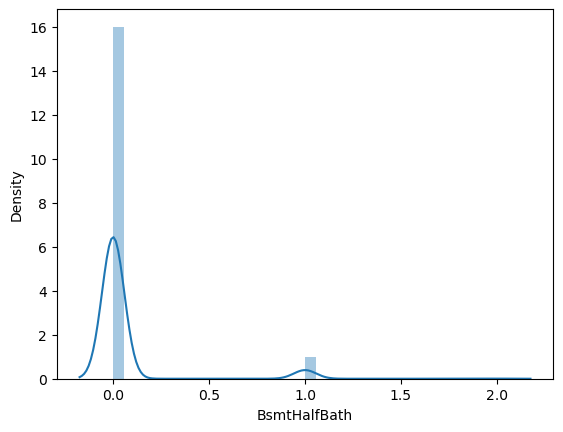

Skewness: 0.044772220896532405
count    1168.000000
mean        1.571918
std         0.546045
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


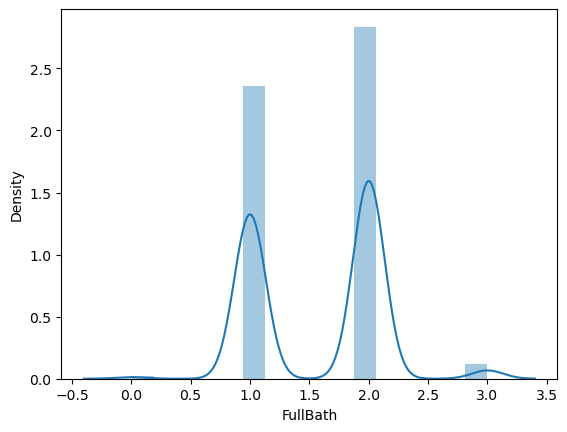

Skewness: 0.7138288142735408
count    1168.000000
mean        0.380137
std         0.504665
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


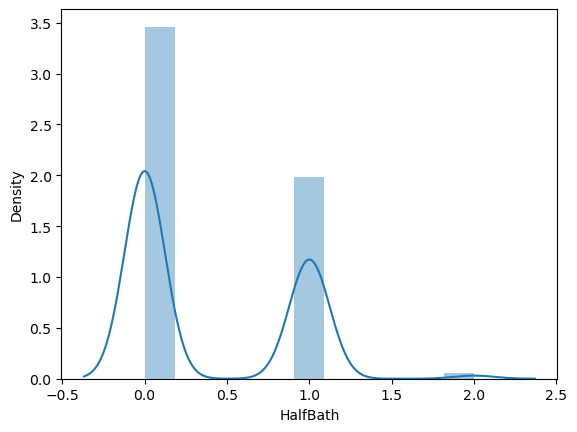

Skewness: 0.2577288704691379
count    1168.000000
mean        2.872432
std         0.818589
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


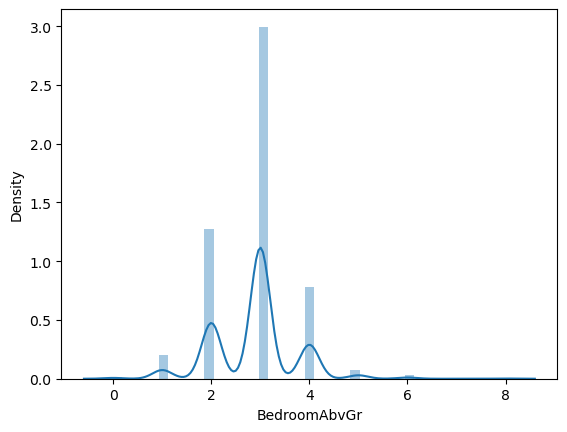

Skewness: 3.948206237084816
count    1168.000000
mean        1.048801
std         0.219484
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: KitchenAbvGr, dtype: float64


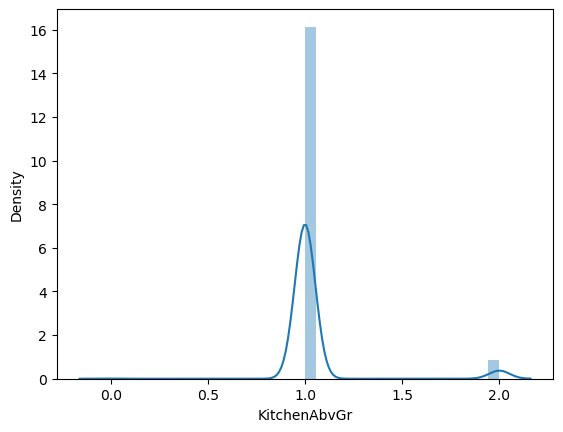

Skewness: 0.6781048307187435
count    1168.000000
mean        6.548801
std         1.626478
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


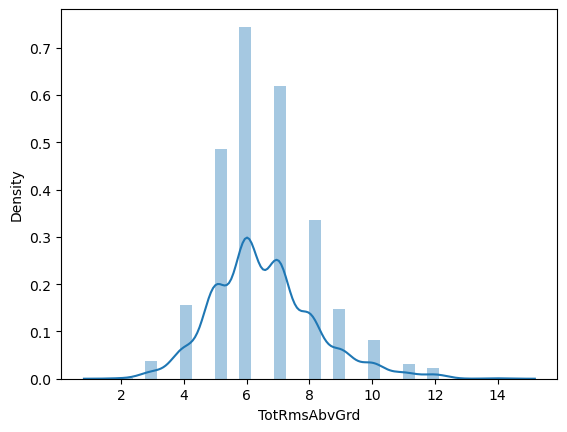

Skewness: 0.6423100558898825
count    1168.000000
mean        0.619863
std         0.648787
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


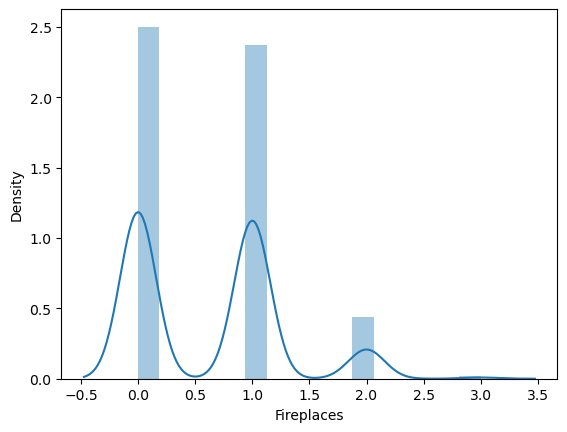

Skewness: -0.35994233040095913
count    1168.000000
mean        1.774829
std         0.734614
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


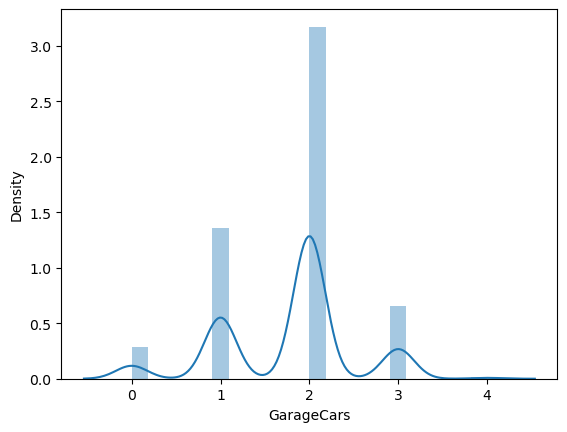

Skewness: 0.1667359145144407
count    1168.000000
mean      474.120719
std       210.856384
min         0.000000
25%       336.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


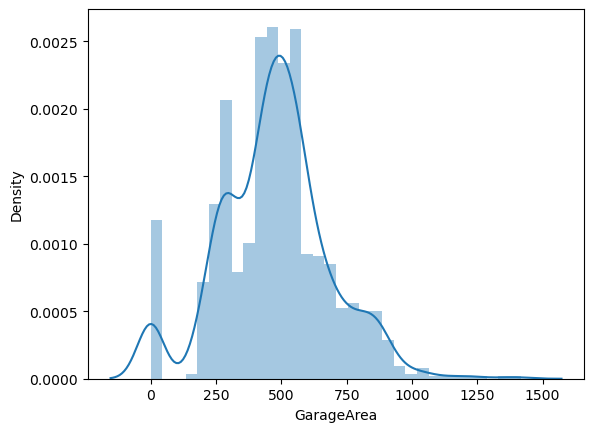

Skewness: 1.3277802889051675
count    1168.000000
mean       94.656678
std       122.161984
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       736.000000
Name: WoodDeckSF, dtype: float64


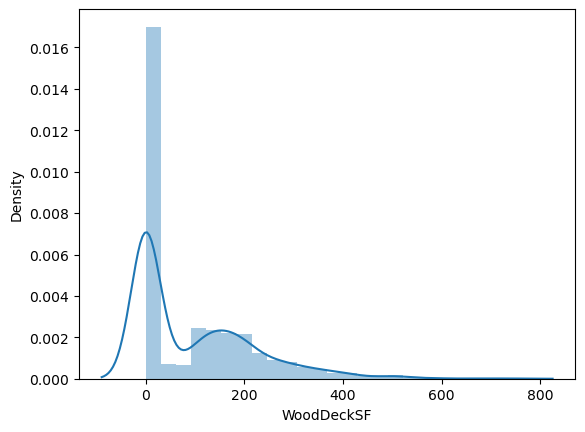

Skewness: 2.46507197601149
count    1168.000000
mean       47.315925
std        67.699475
min         0.000000
25%         0.000000
50%        27.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64


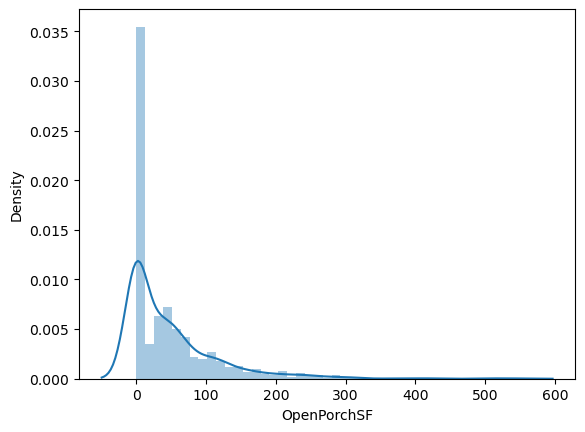

Skewness: 2.081707305978775
count    1168.000000
mean        0.713038
std         1.747452
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.315358
Name: EnclosedPorch, dtype: float64


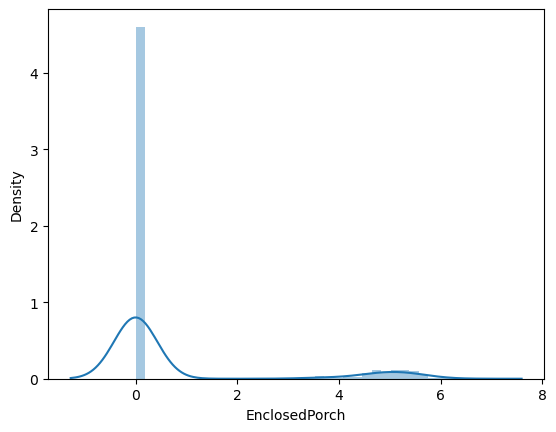

Skewness: 7.722978293081807
count    1168.000000
mean        0.086837
std         0.677400
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.232448
Name: 3SsnPorch, dtype: float64


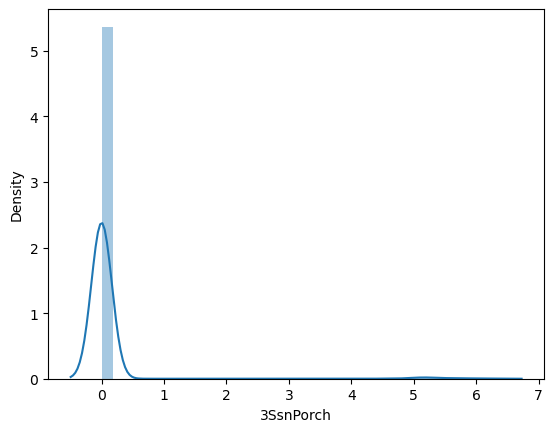

Skewness: 3.0239706524653305
count    1168.000000
mean        0.437993
std         1.445220
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.175867
Name: ScreenPorch, dtype: float64


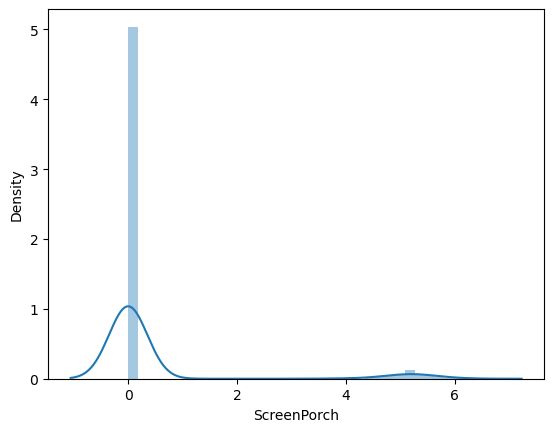

Skewness: 15.859557242801852
count    1168.000000
mean        2.418664
std        37.390139
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


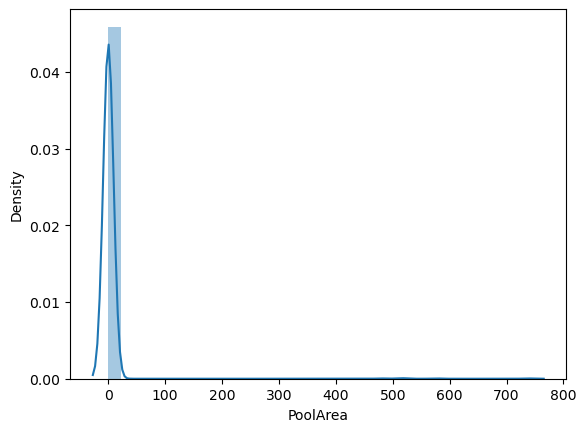

Skewness: 22.18328556234878
count     1168.000000
mean        49.948630
std        551.953605
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


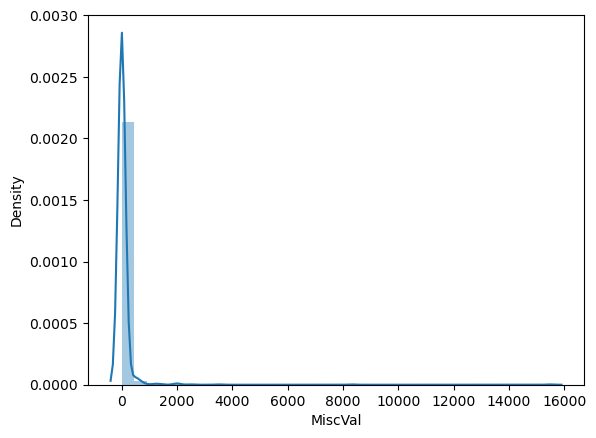

Skewness: 1.8963846496840784
count     1168.000000
mean      2586.553938
std        827.681331
min        334.000000
25%       2036.000000
50%       2495.000000
75%       3044.250000
max      11752.000000
Name: TotalSF, dtype: float64


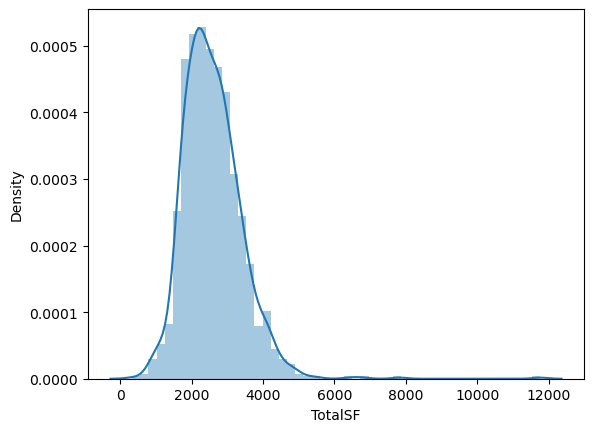

Skewness: 0.2681817027313006
count    1168.000000
mean        2.229024
std         0.787099
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Total_Bathrooms, dtype: float64


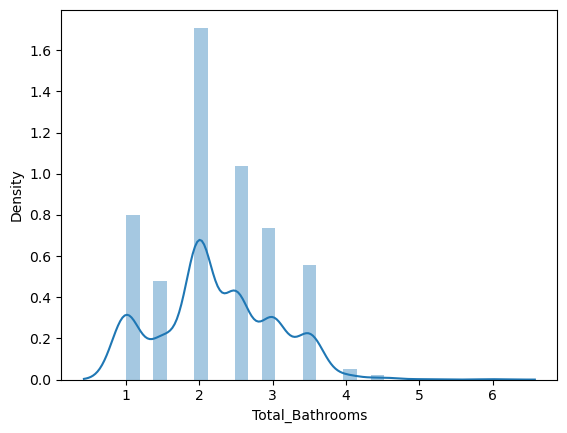

Skewness: 0.48308713843112117
count    1168.000000
mean        0.467038
std         0.516216
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: Bsmt_Baths, dtype: float64


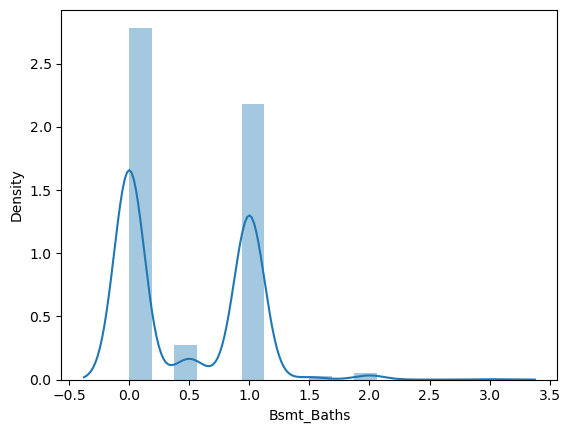

Skewness: 0.12671784376104375
count    1168.000000
mean        1.761986
std         0.630782
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.500000
Name: Total_BathAbvGrd, dtype: float64


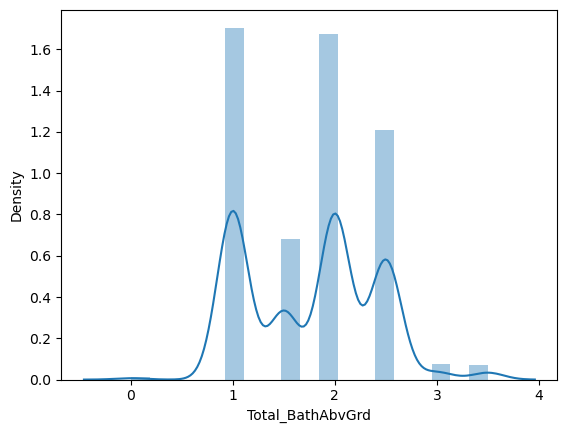

Skewness: 0.8826039337855185
count    1168.000000
mean      207.860065
std        37.665418
min       118.181818
25%       181.444444
50%       204.250842
75%       228.690972
max       434.000000
Name: AvgRoomSize, dtype: float64


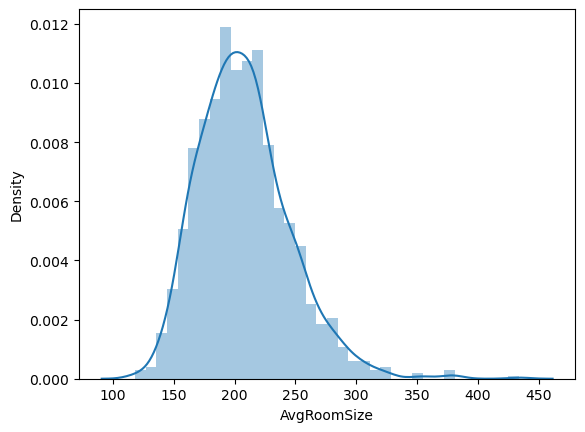

Skewness: 1.0247206533227886
count    1168.000000
mean      184.494007
std       156.100680
min         0.000000
25%        49.000000
50%       168.000000
75%       272.000000
max      1027.000000
Name: Total_porch_sf, dtype: float64


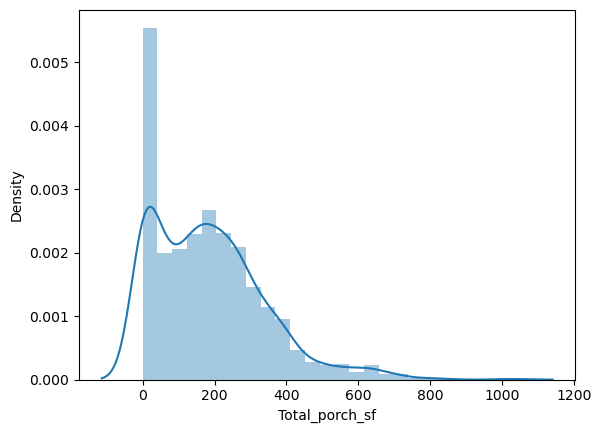

Skewness: 0.8201067500864747
count    1168.000000
mean        5.269692
std         2.803100
min         0.000000
25%         3.000000
50%         4.500000
75%         7.500000
max        18.000000
Name: BedBath, dtype: float64


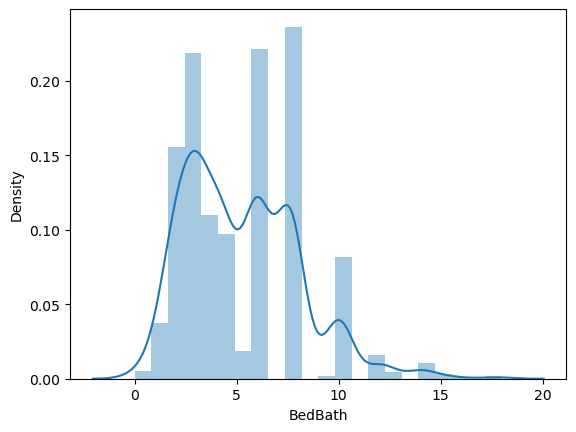

Skewness: -0.1329306896992866
count    1168.000000
mean        9.122933
std         0.512741
min         7.188413
25%         8.932609
50%         9.167015
75%         9.367033
max        12.280229
Name: TotalLot, dtype: float64


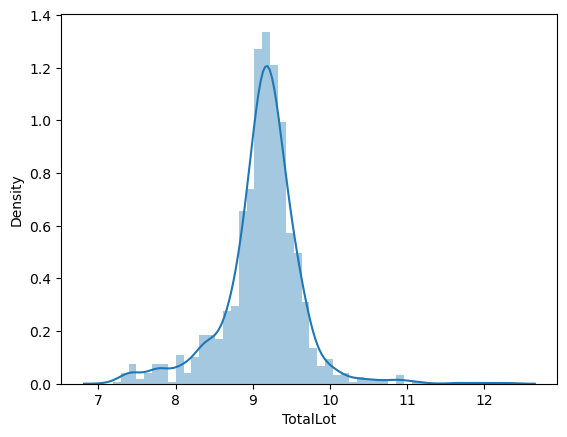

Skewness: -0.4091880560408092
count    1168.000000
mean        7.812096
std         0.313826
min         5.811141
25%         7.620092
50%         7.822445
75%         8.021338
max         9.371779
Name: sqft_living, dtype: float64


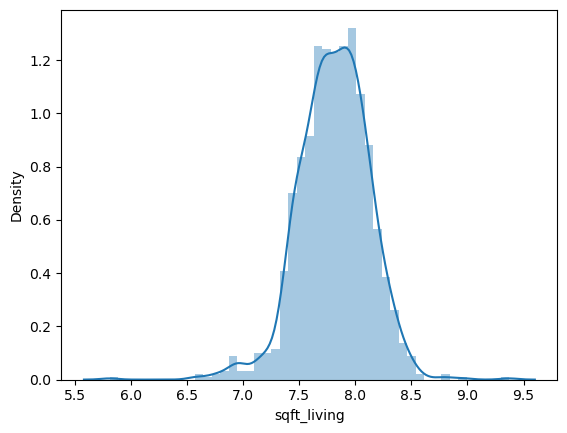

Skewness: 0.6288829982080021
count    1168.000000
mean       36.067637
std        30.325592
min         0.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: age, dtype: float64


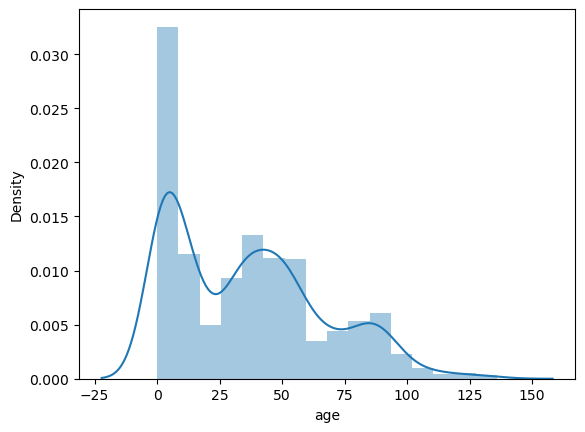

In [17]:
for col in num_feat:
    plt.tight_layout()
    sns.distplot(training[col])
    print("Skewness: "+str(training[col].skew()))
    print(training[col].describe())
    plt.show()

Skewness: 0.1913637507970349
count    1168.000000
mean        6.134418
std         1.369861
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


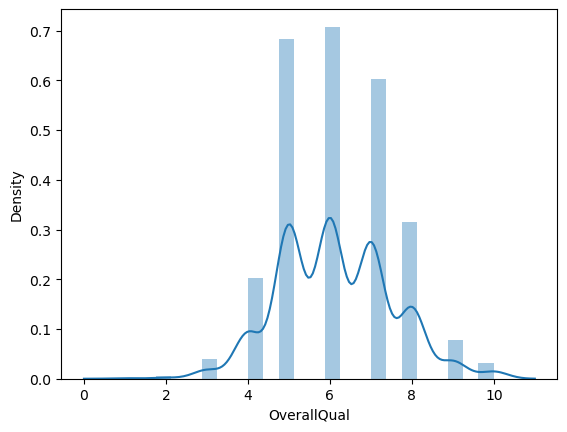

Skewness: 0.7687460244467823
count    1168.000000
mean        5.596747
std         1.111237
min         2.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64


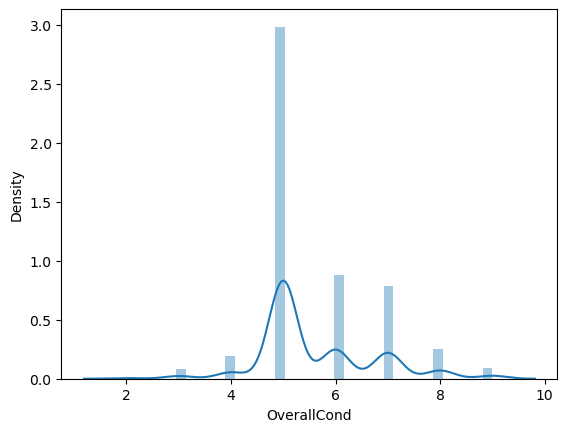

Skewness: 0.22818594996835914
count    1168.000000
mean        6.291096
std         2.689124
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64


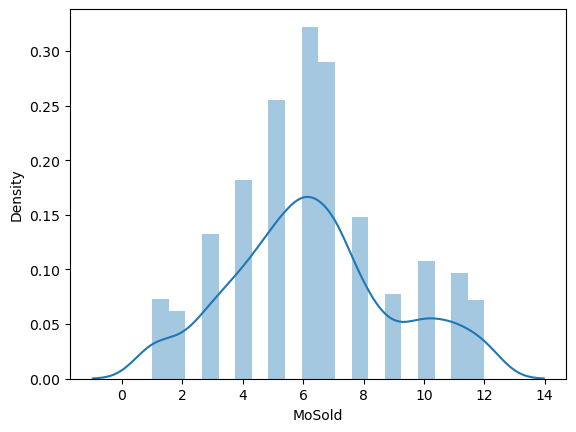

Skewness: -0.5563886645347321
count    1168.000000
mean        1.907534
std         1.419660
min         0.000000
25%         0.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: LotShape, dtype: float64


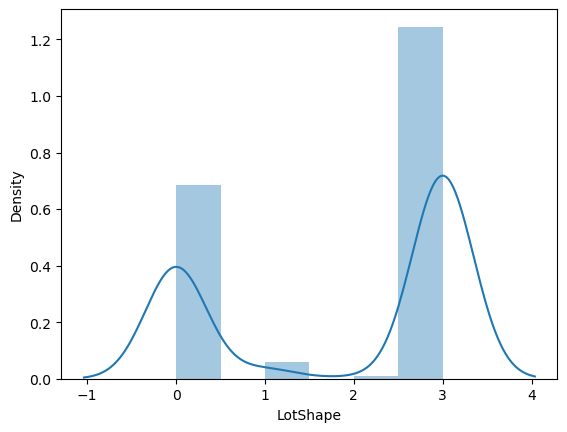

Skewness: -3.200784939445386
count    1168.000000
mean        2.779110
std         0.710438
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: LandContour, dtype: float64


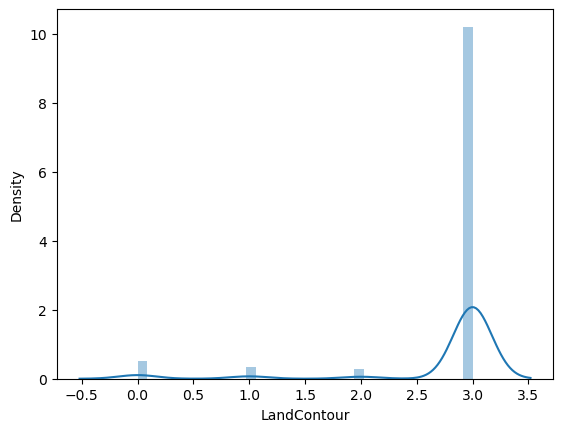

Skewness: 4.967502227322793
count    1168.000000
mean        0.056507
std         0.258979
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: LandSlope, dtype: float64


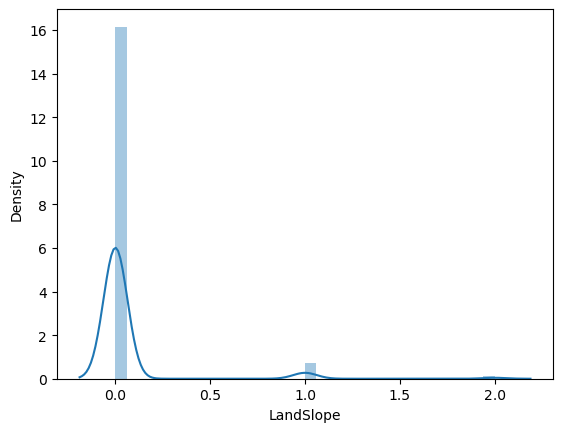

Skewness: -1.7943972988525658
count    1168.000000
mean        2.528253
std         0.692144
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: ExterQual, dtype: float64


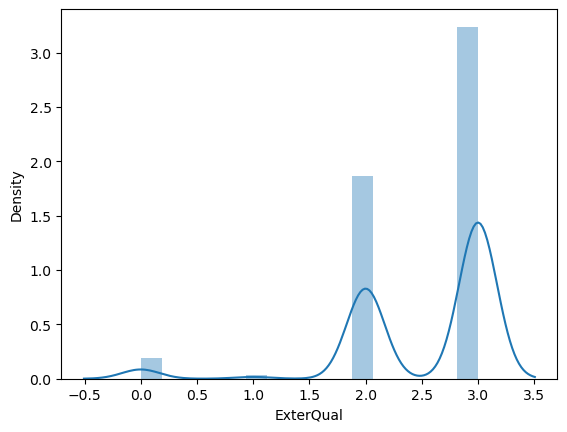

Skewness: -2.576726205792078
count    1168.000000
mean        3.738014
std         0.720511
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: ExterCond, dtype: float64


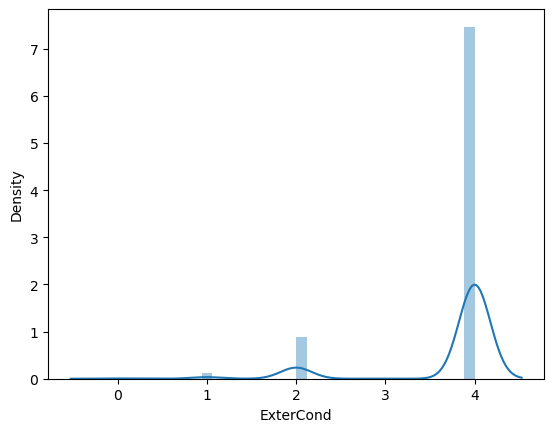

Skewness: -0.46118934909067105
count    1168.000000
mean        2.714041
std         1.261278
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         4.000000
Name: BsmtQual, dtype: float64


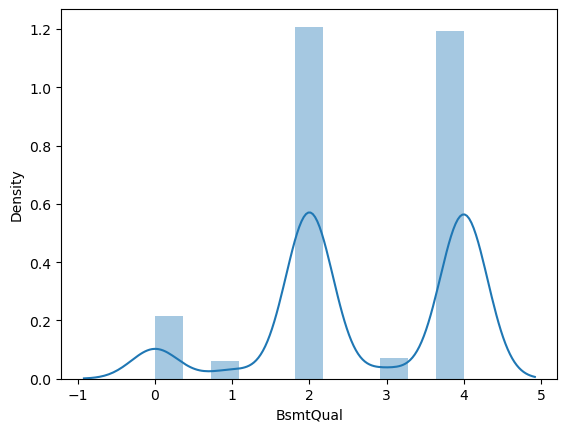

Skewness: -2.920417352686143
count    1168.000000
mean        3.689212
std         0.950436
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: BsmtCond, dtype: float64


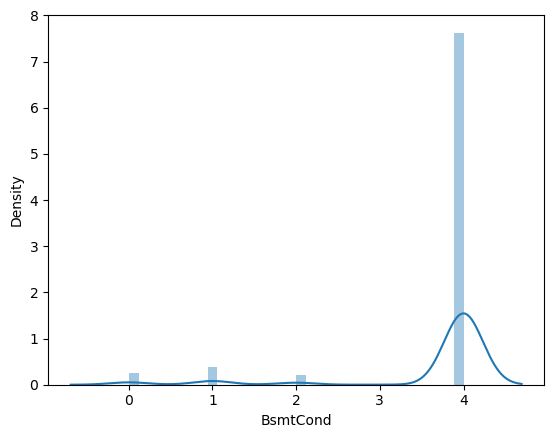

Skewness: -0.917775284804224
count    1168.000000
mean        2.889555
std         1.587427
min         0.000000
25%         1.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: BsmtExposure, dtype: float64


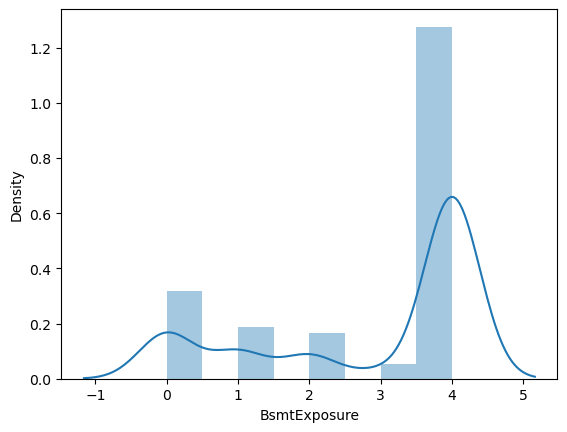

Skewness: 0.13717722075581987
count    1168.000000
mean        3.123288
std         2.243193
min         0.000000
25%         1.750000
50%         2.000000
75%         6.000000
max         6.000000
Name: BsmtFinType1, dtype: float64


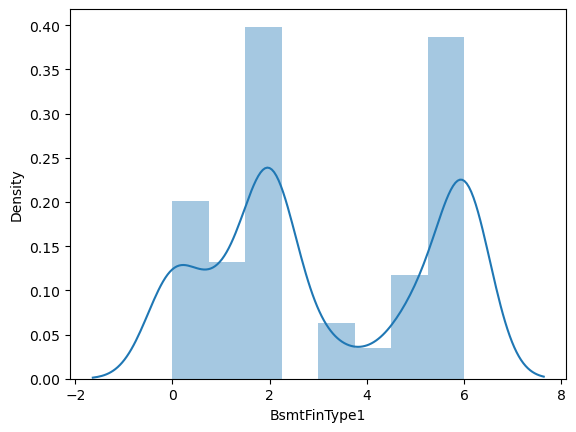

Skewness: -4.473332014940286
count    1168.000000
mean        1.859507
std         0.302367
min         0.000000
25%         1.945910
50%         1.945910
75%         1.945910
max         1.945910
Name: BsmtFinType2, dtype: float64


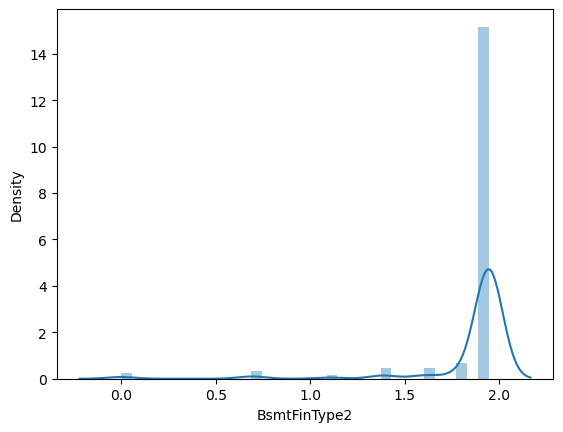

Skewness: 0.5032785107486933
count    1168.000000
mean        1.520548
std         1.747935
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max         4.000000
Name: HeatingQC, dtype: float64


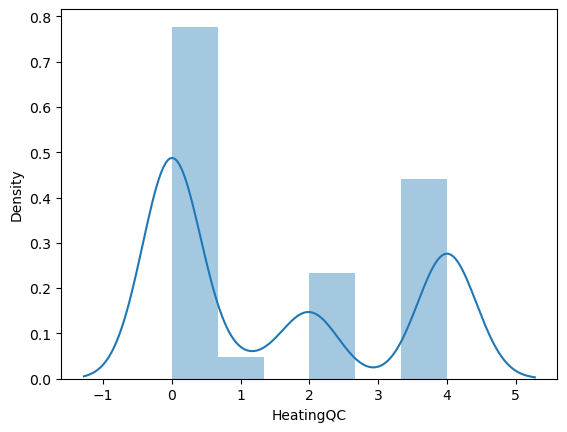

Skewness: -2.32997397235629
count    1168.000000
mean        1.154429
std         0.353787
min         0.000000
25%         1.098612
50%         1.098612
75%         1.386294
max         1.386294
Name: KitchenQual, dtype: float64


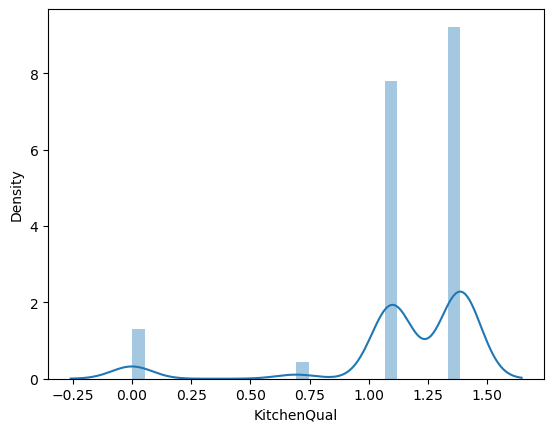

Skewness: -4.2213432339884704
count    1168.000000
mean        5.769692
std         0.926172
min         0.000000
25%         6.000000
50%         6.000000
75%         6.000000
max         6.000000
Name: Functional, dtype: float64


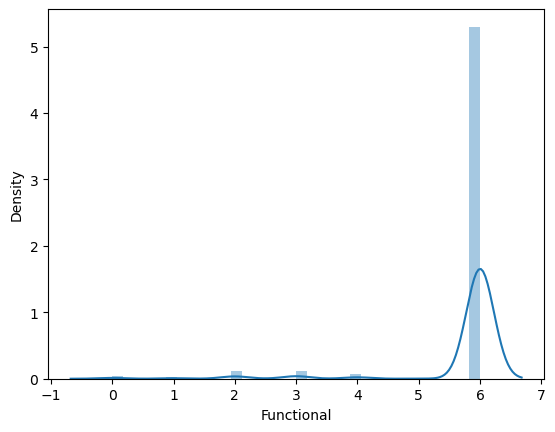

Skewness: 0.3108849260310347
count    1168.000000
mean        3.071918
std         1.169433
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: FireplaceQu, dtype: float64


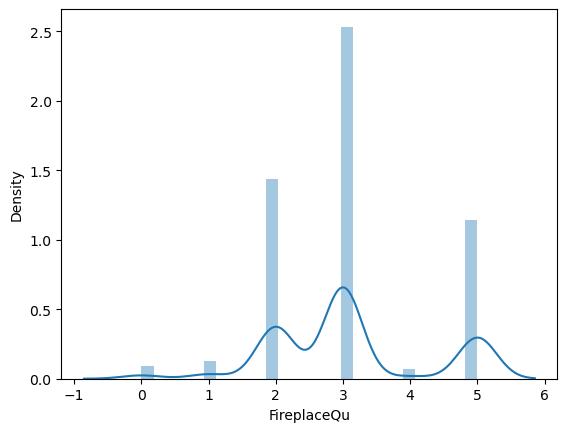

Skewness: -0.6077651864958665
count    1168.000000
mean        1.862158
std         1.186473
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: GarageFinish, dtype: float64


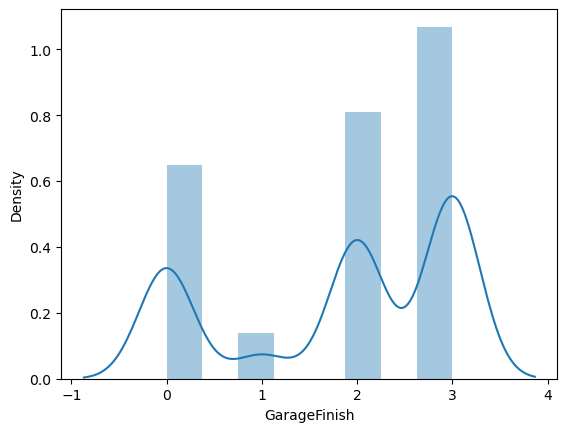

Skewness: -3.2317075777098654
count    1168.000000
mean        4.714041
std         0.906271
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: GarageQual, dtype: float64


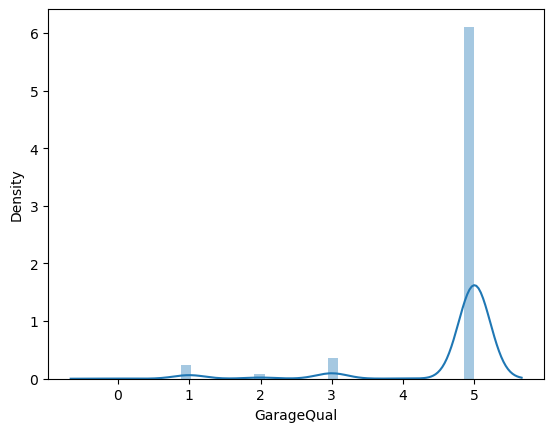

Skewness: -3.602124188093736
count    1168.000000
mean        4.767123
std         0.796661
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: GarageCond, dtype: float64


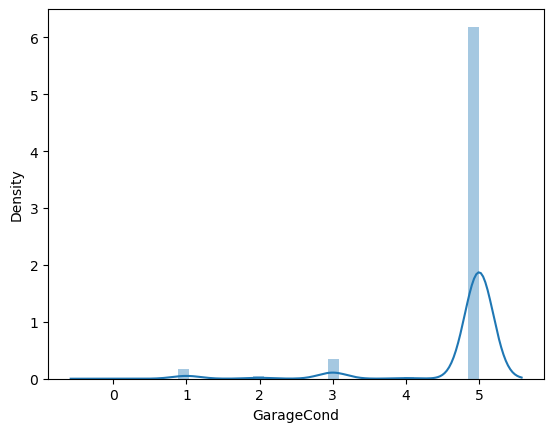

Skewness: -3.32135623442043
count    1168.000000
mean        1.857021
std         0.494288
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: PavedDrive, dtype: float64


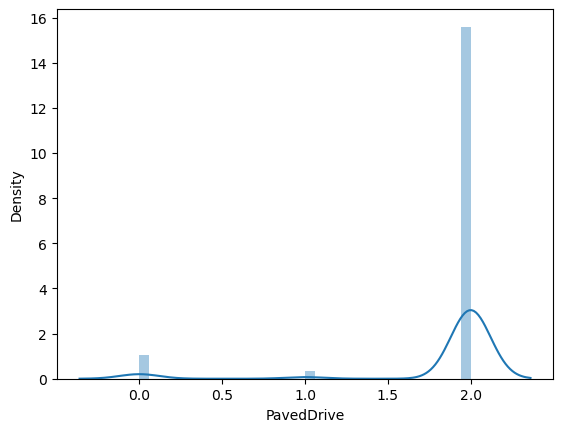

Skewness: -20.24664309046864
count    1168.000000
mean        2.993151
std         0.116891
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: PoolQC, dtype: float64


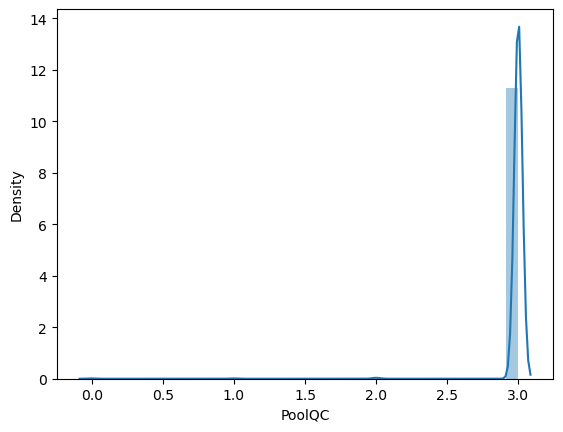

In [18]:
for col in od_num+od_cat:
    plt.tight_layout()
    sns.distplot(training[col])
    print("Skewness: "+str(training[col].skew()))
    print(training[col].describe())
    plt.show()

In [19]:
def get_outliers(df, num_feat):
    outlier_df = pd.DataFrame(columns=['Feature', 'Total Outliers','Upper limit', 'Lower limit'])
    for col in num_feat:      
#         lower = df[col].mean() - df[col].std() * 3
#         upper = df[col].mean() + df[col].std() * 3
        lower=np.percentile(df[col],25)-(1.5*iqr(df[col]))
        upper=np.percentile(df[col],75)+(1.5*iqr(df[col]))
        upper_outliers = df[df[col] > upper]
        lower_outliers = df[df[col] < lower]
        total=lower_outliers.shape[0]+upper_outliers.shape[0]
        if (total!=0) and (upper!=0 and lower!=0):
            new_row_df = pd.DataFrame([{'Feature':col, 'Total Outliers': total,'Upper limit': upper, 'Lower limit':lower}])
            outlier_df = pd.concat([outlier_df, new_row_df], ignore_index=True)#outlier_df.append({'Feature':col, 'Total Outliers': total,'Upper limit': upper, 'Lower limit':lower}, ignore_index=True)
    return outlier_df
def remove_outliers(df, outlier_df):
    for col in outlier_df['Feature'].to_list():
        upper = outlier_df[outlier_df['Feature']== col ]['Upper limit'].values[0]
        lower = outlier_df[outlier_df['Feature']== col ]['Lower limit'].values[0]
        df[col] = np.where((df[col]<lower)|(df[col]>upper), df[col].median(), df[col])
    return df
feat_list=['LotFrontage','BsmtFinSF2','TotalBsmtSF','LowQualFinSF','BsmtHalfBath','MiscVal','LandContour','LandSlope','BsmtCond','Functional','KitchenAbvGr']
outlier_df = get_outliers(training,feat_list)
training=remove_outliers(training,outlier_df)

Skewness: 0.0012772540756626934
count    1168.000000
mean       69.451627
std        15.025229
min        30.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       110.000000
Name: LotFrontage, dtype: float64


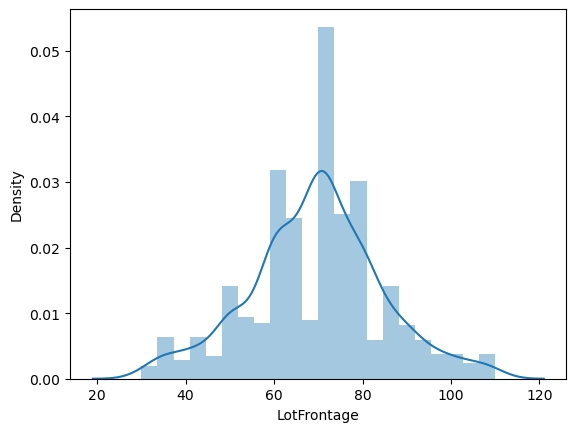

Skewness: 12.397355223058842
count      1168.000000
mean      10542.357877
std        9875.947661
min        1300.000000
25%        7500.000000
50%        9501.500000
75%       11621.750000
max      215245.000000
Name: LotArea, dtype: float64


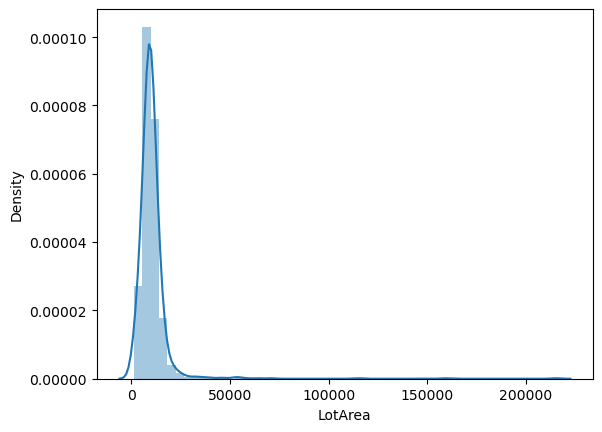

Skewness: 0.45481367333930606
count    1168.000000
mean        2.178103
std         2.639009
min         0.000000
25%         0.000000
50%         0.000000
75%         5.141664
max         7.378384
Name: MasVnrArea, dtype: float64


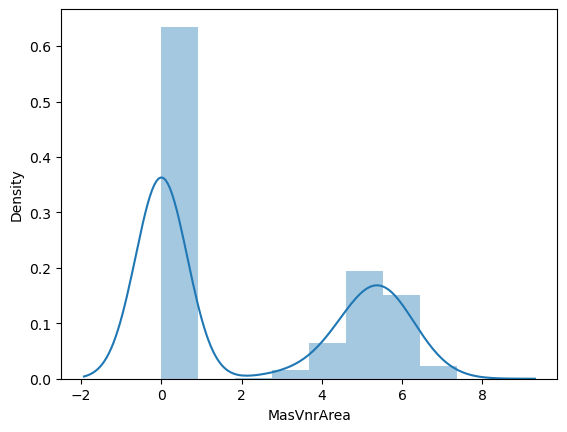

Skewness: -0.6358466823110941
count    1168.000000
mean        4.264079
std         2.991403
min         0.000000
25%         0.000000
50%         5.990213
75%         6.592700
max         8.638525
Name: BsmtFinSF1, dtype: float64


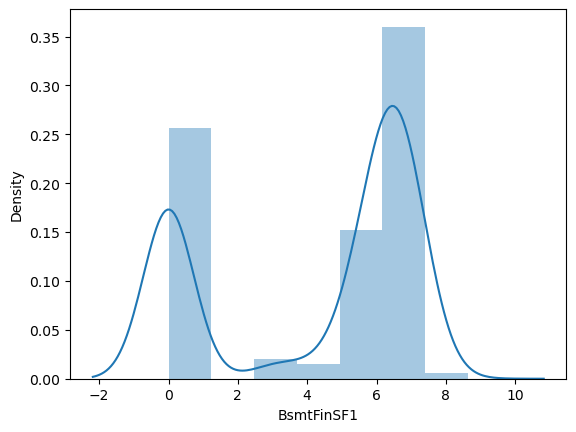

Skewness: 4.418298341491956
count    1168.000000
mean       44.667808
std       161.909961
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


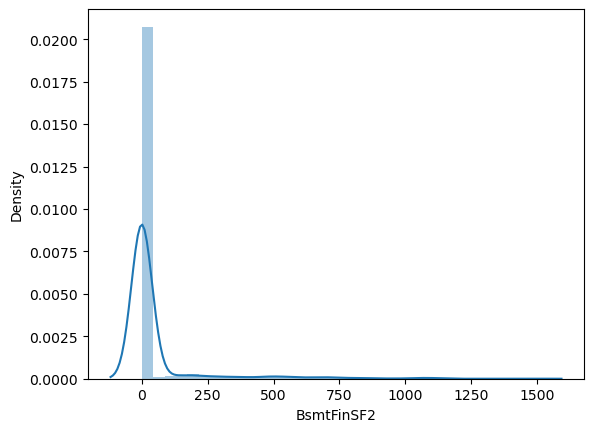

Skewness: 0.9156195058189517
count    1168.000000
mean      572.617295
std       448.642738
min         0.000000
25%       223.750000
50%       484.000000
75%       815.250000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


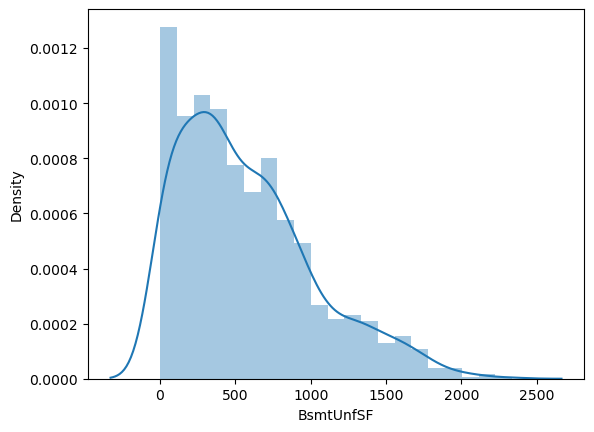

Skewness: 0.5500392620758578
count    1168.000000
mean     1070.431507
std       345.471064
min       105.000000
25%       822.750000
50%      1007.500000
75%      1286.500000
max      2078.000000
Name: TotalBsmtSF, dtype: float64


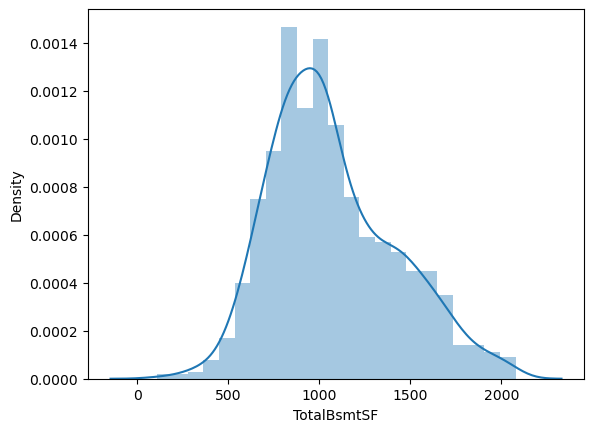

Skewness: 0.0446296285820502
count    1168.000000
mean        7.018918
std         0.321590
min         5.814131
25%         6.790097
50%         7.002611
75%         7.260523
max         8.453827
Name: 1stFlrSF, dtype: float64


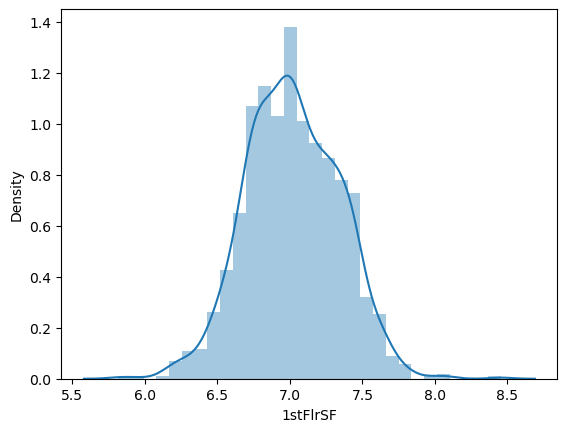

Skewness: 0.806232127721198
count    1168.000000
mean      340.278253
std       434.272050
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      1872.000000
Name: 2ndFlrSF, dtype: float64


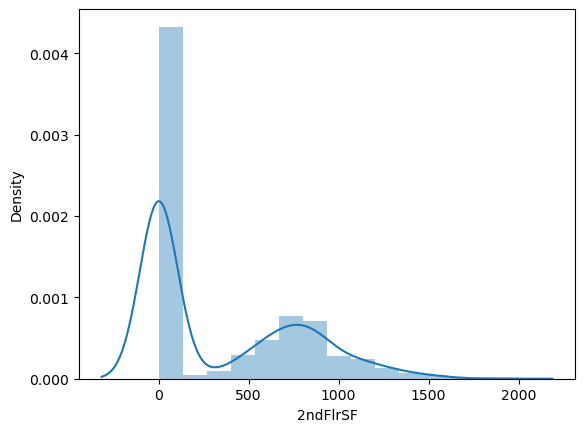

Skewness: 9.862965922072567
count    1168.000000
mean        5.094178
std        45.317916
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


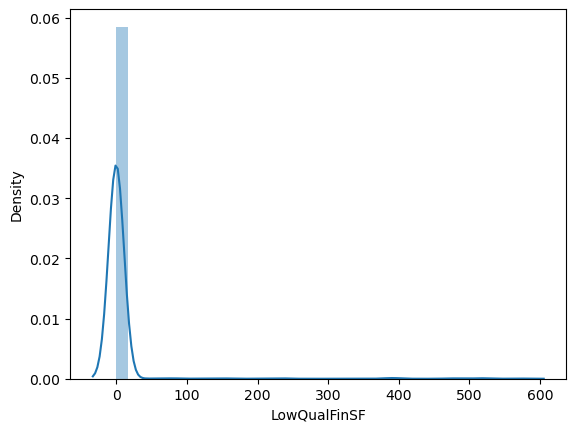

Skewness: -0.053448319803682226
count    1168.000000
mean        7.272318
std         0.332859
min         5.811141
25%         7.033065
50%         7.293018
75%         7.489971
max         8.637994
Name: GrLivArea, dtype: float64


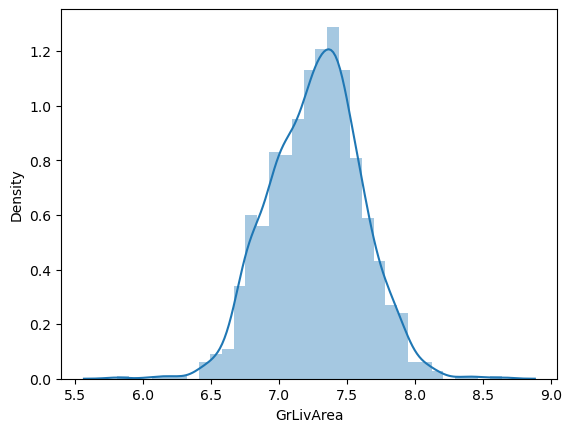

Skewness: 0.5600035678088299
count    1168.000000
mean        0.437500
std         0.521547
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


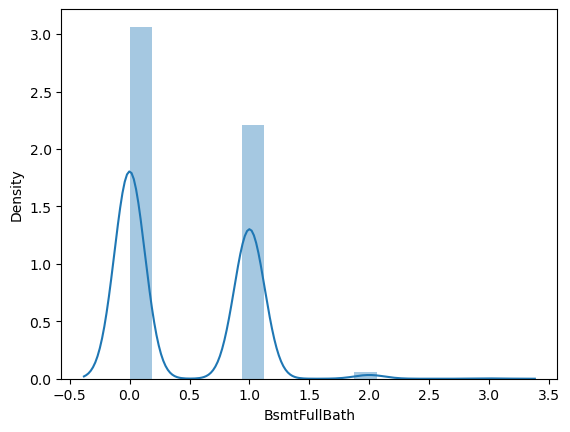

Skewness: 3.9314205648864204
count    1168.000000
mean        0.059075
std         0.239472
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


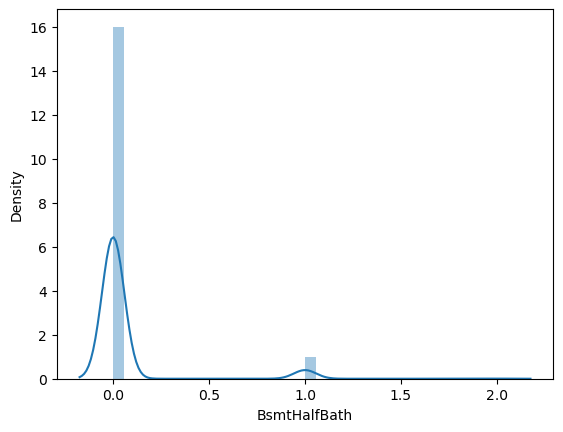

Skewness: 0.044772220896532405
count    1168.000000
mean        1.571918
std         0.546045
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


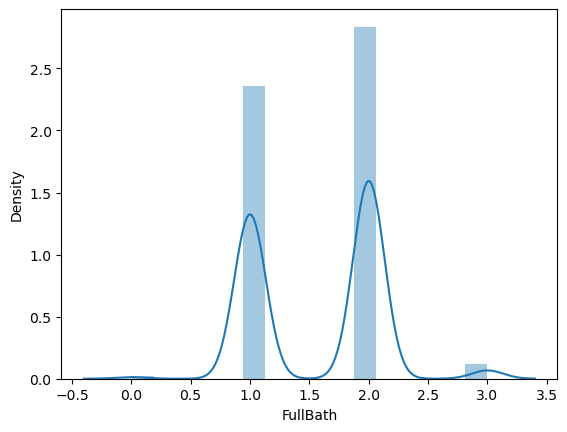

Skewness: 0.7138288142735408
count    1168.000000
mean        0.380137
std         0.504665
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


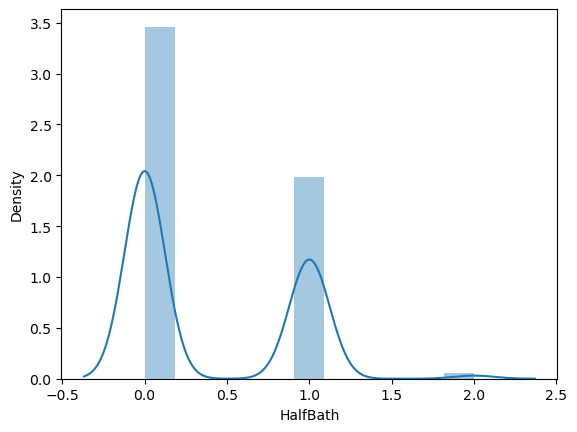

Skewness: 0.2577288704691379
count    1168.000000
mean        2.872432
std         0.818589
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


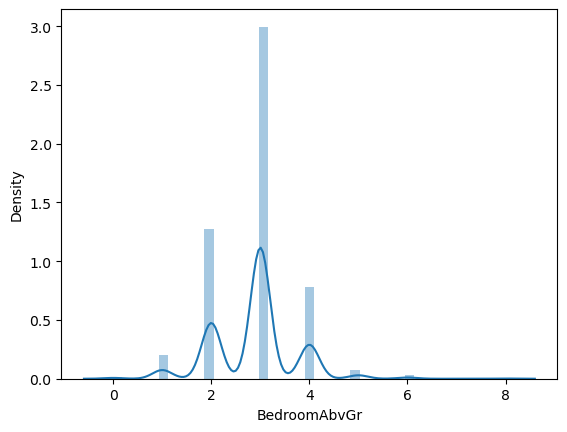

Skewness: 0
count    1168.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: KitchenAbvGr, dtype: float64


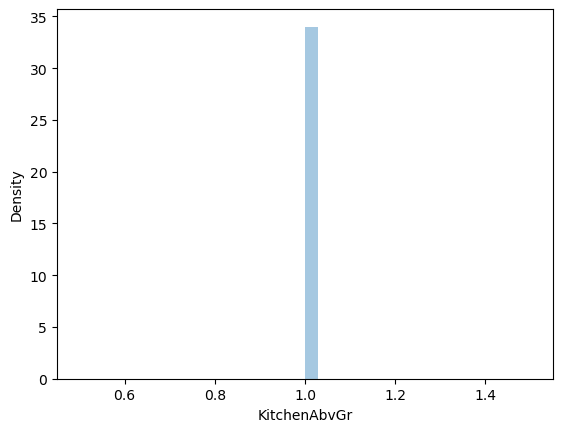

Skewness: 0.6781048307187435
count    1168.000000
mean        6.548801
std         1.626478
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


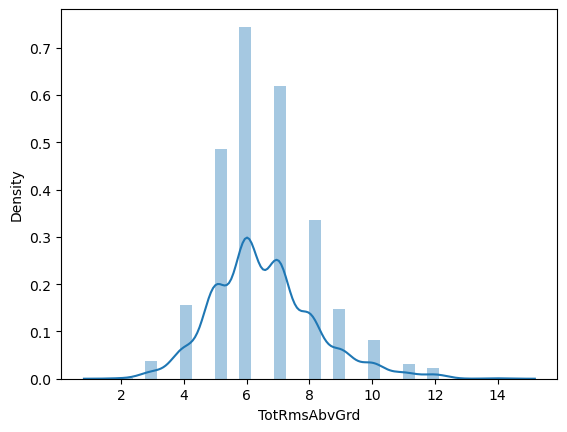

Skewness: 0.6423100558898825
count    1168.000000
mean        0.619863
std         0.648787
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


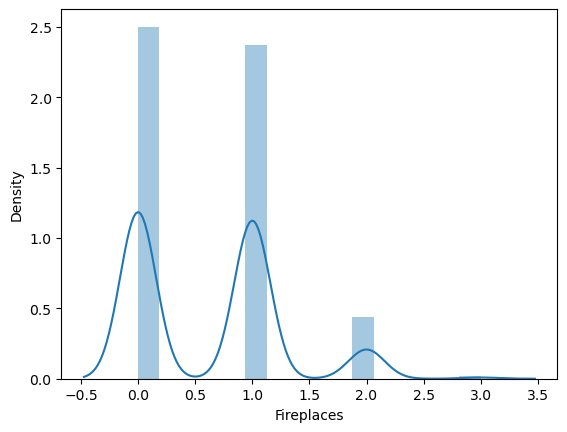

Skewness: -0.35994233040095913
count    1168.000000
mean        1.774829
std         0.734614
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


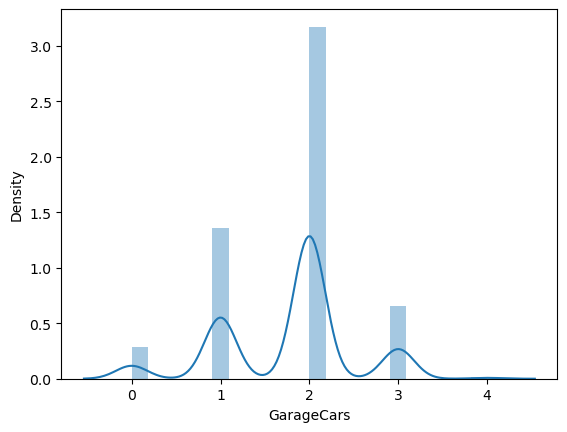

Skewness: 0.1667359145144407
count    1168.000000
mean      474.120719
std       210.856384
min         0.000000
25%       336.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


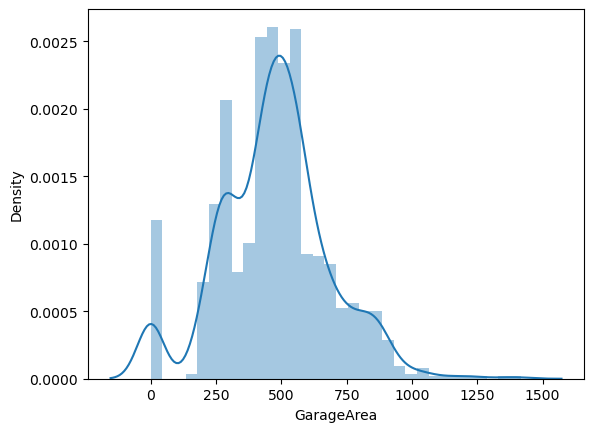

Skewness: 1.3277802889051675
count    1168.000000
mean       94.656678
std       122.161984
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       736.000000
Name: WoodDeckSF, dtype: float64


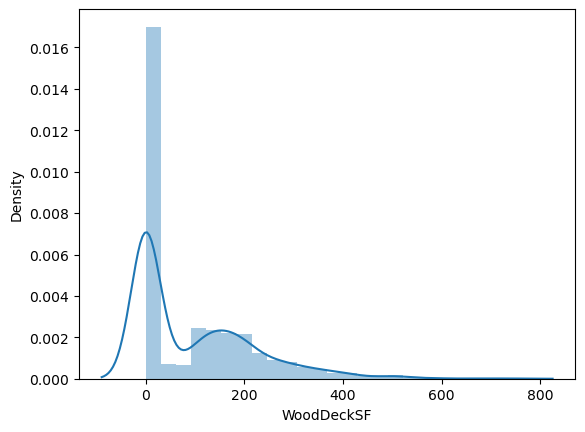

Skewness: 2.46507197601149
count    1168.000000
mean       47.315925
std        67.699475
min         0.000000
25%         0.000000
50%        27.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64


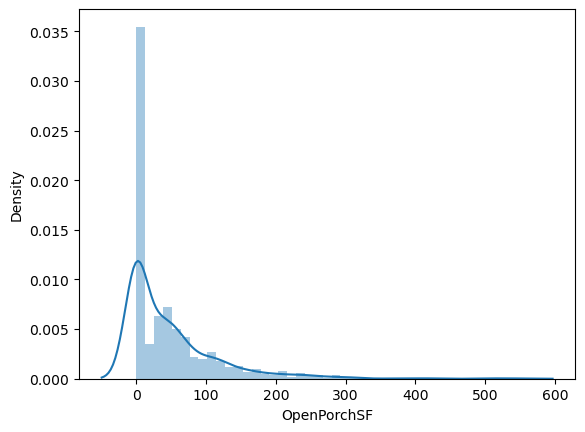

Skewness: 2.081707305978775
count    1168.000000
mean        0.713038
std         1.747452
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.315358
Name: EnclosedPorch, dtype: float64


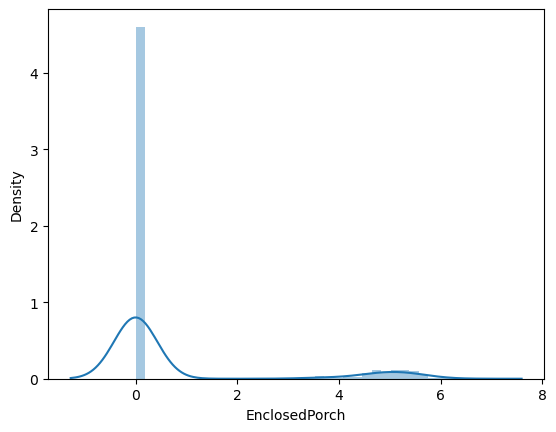

Skewness: 7.722978293081807
count    1168.000000
mean        0.086837
std         0.677400
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.232448
Name: 3SsnPorch, dtype: float64


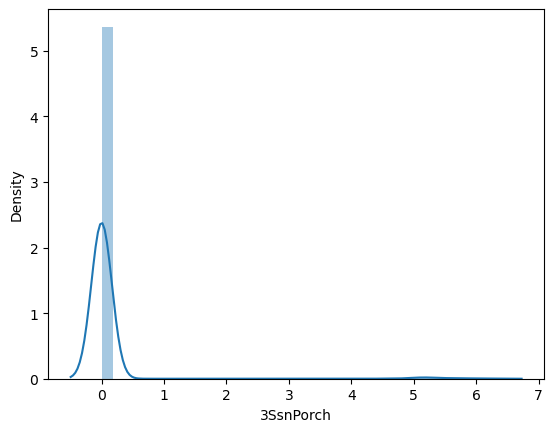

Skewness: 3.0239706524653305
count    1168.000000
mean        0.437993
std         1.445220
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.175867
Name: ScreenPorch, dtype: float64


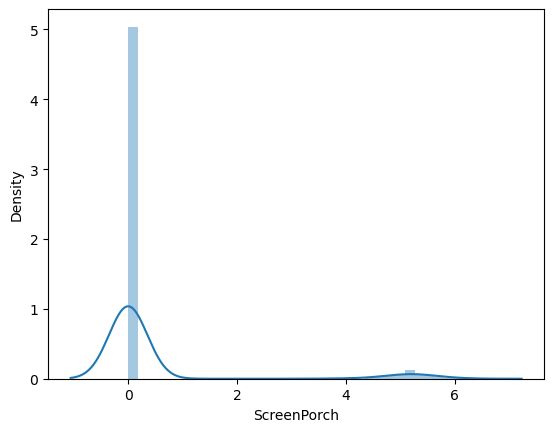

Skewness: 15.859557242801852
count    1168.000000
mean        2.418664
std        37.390139
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


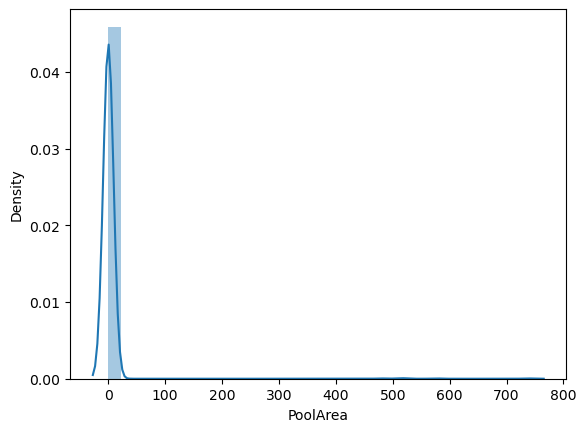

Skewness: 22.18328556234878
count     1168.000000
mean        49.948630
std        551.953605
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


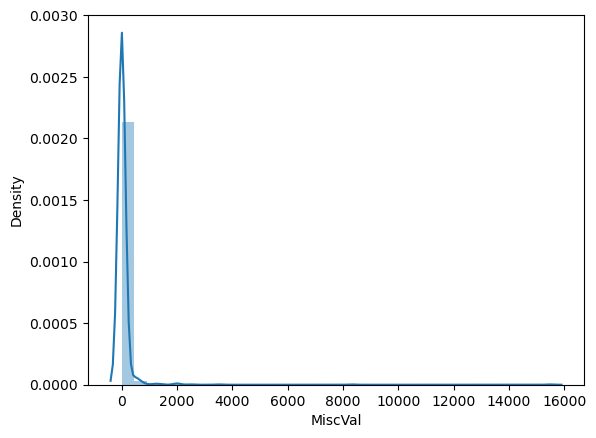

Skewness: 1.8963846496840784
count     1168.000000
mean      2586.553938
std        827.681331
min        334.000000
25%       2036.000000
50%       2495.000000
75%       3044.250000
max      11752.000000
Name: TotalSF, dtype: float64


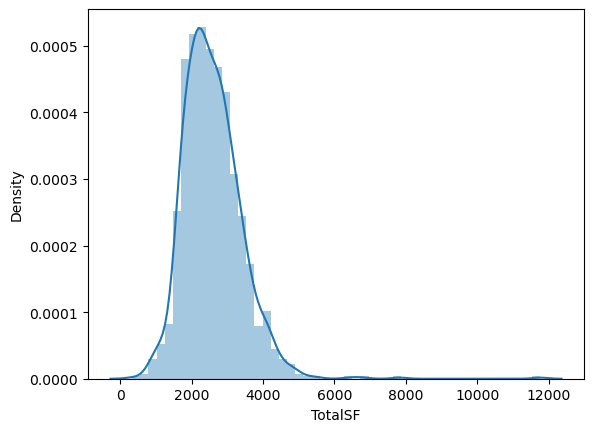

Skewness: 0.2681817027313006
count    1168.000000
mean        2.229024
std         0.787099
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Total_Bathrooms, dtype: float64


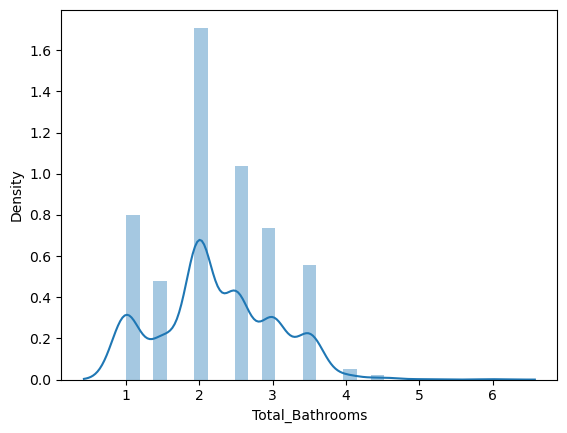

Skewness: 0.48308713843112117
count    1168.000000
mean        0.467038
std         0.516216
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: Bsmt_Baths, dtype: float64


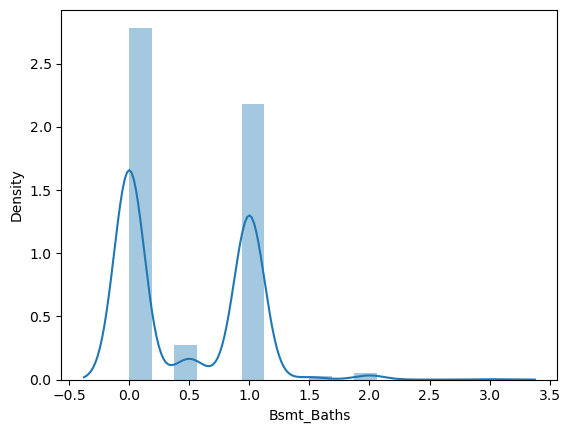

Skewness: 0.12671784376104375
count    1168.000000
mean        1.761986
std         0.630782
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.500000
Name: Total_BathAbvGrd, dtype: float64


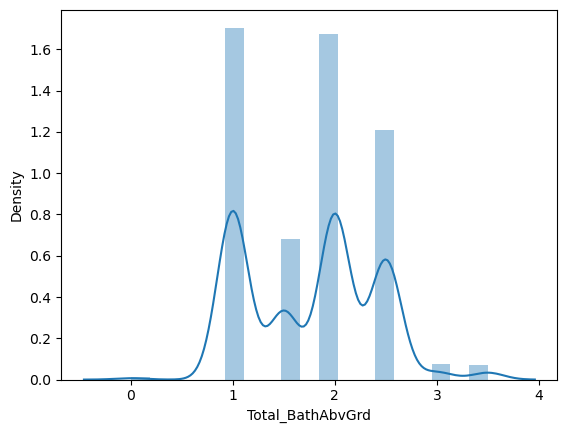

Skewness: 0.8826039337855185
count    1168.000000
mean      207.860065
std        37.665418
min       118.181818
25%       181.444444
50%       204.250842
75%       228.690972
max       434.000000
Name: AvgRoomSize, dtype: float64


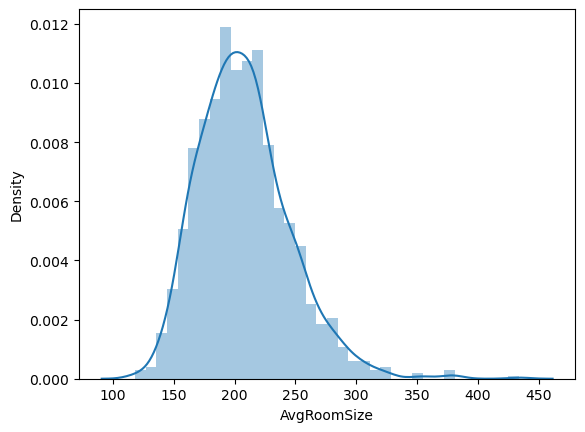

Skewness: 1.0247206533227886
count    1168.000000
mean      184.494007
std       156.100680
min         0.000000
25%        49.000000
50%       168.000000
75%       272.000000
max      1027.000000
Name: Total_porch_sf, dtype: float64


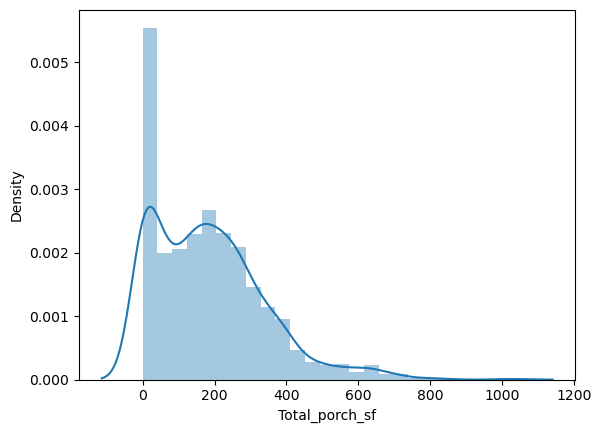

Skewness: 0.8201067500864747
count    1168.000000
mean        5.269692
std         2.803100
min         0.000000
25%         3.000000
50%         4.500000
75%         7.500000
max        18.000000
Name: BedBath, dtype: float64


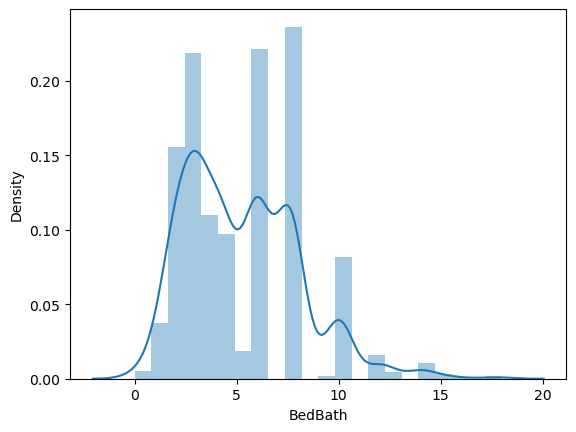

Skewness: -0.1329306896992866
count    1168.000000
mean        9.122933
std         0.512741
min         7.188413
25%         8.932609
50%         9.167015
75%         9.367033
max        12.280229
Name: TotalLot, dtype: float64


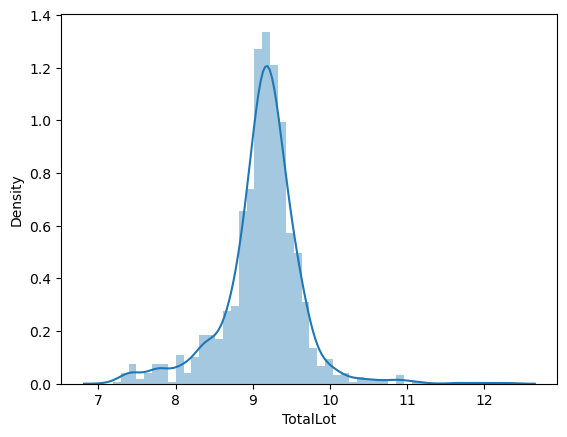

Skewness: -0.4091880560408092
count    1168.000000
mean        7.812096
std         0.313826
min         5.811141
25%         7.620092
50%         7.822445
75%         8.021338
max         9.371779
Name: sqft_living, dtype: float64


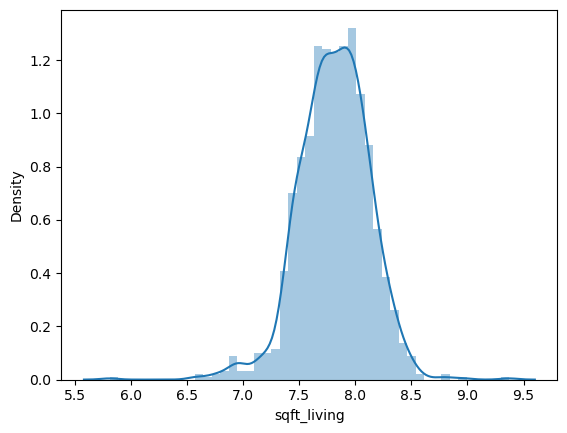

Skewness: 0.6288829982080021
count    1168.000000
mean       36.067637
std        30.325592
min         0.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: age, dtype: float64


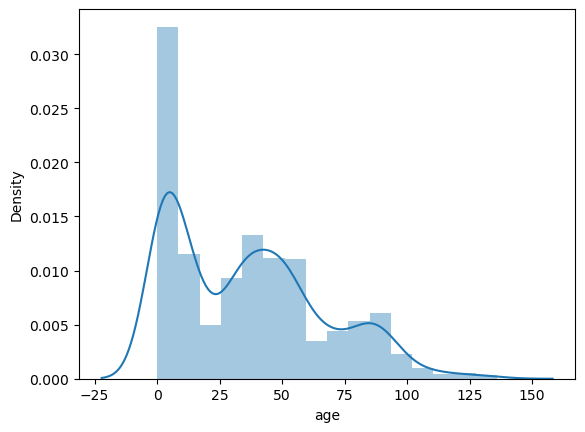

In [31]:
for col in num_feat:
    plt.tight_layout()
    sns.distplot(training[col])
    print("Skewness: "+str(training[col].skew()))
    print(training[col].describe())
    plt.show()

Skewness: 0.1913637507970349
count    1168.000000
mean        6.134418
std         1.369861
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


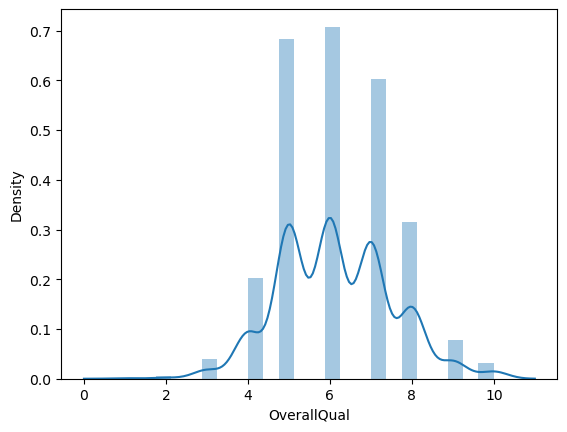

Skewness: 0.7687460244467823
count    1168.000000
mean        5.596747
std         1.111237
min         2.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64


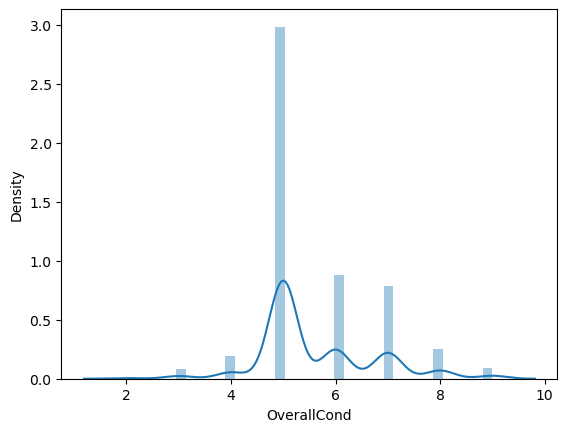

Skewness: 0.22818594996835914
count    1168.000000
mean        6.291096
std         2.689124
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64


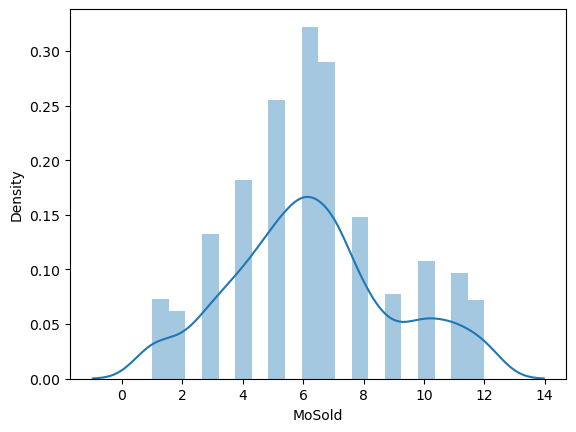

Skewness: -0.5563886645347321
count    1168.000000
mean        1.907534
std         1.419660
min         0.000000
25%         0.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: LotShape, dtype: float64


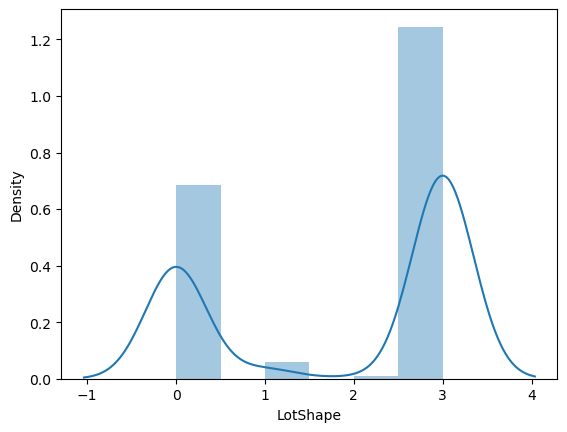

Skewness: 0
count    1168.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: LandContour, dtype: float64


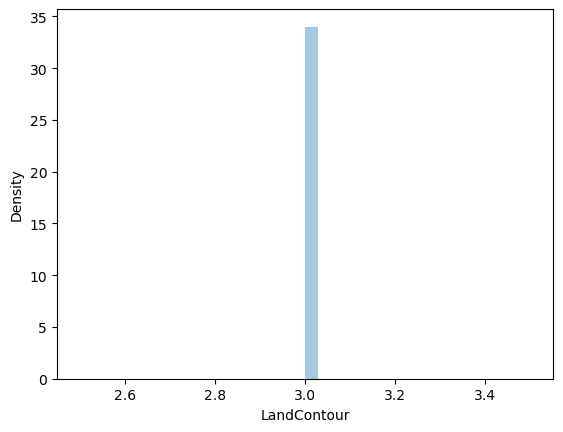

Skewness: 4.967502227322793
count    1168.000000
mean        0.056507
std         0.258979
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: LandSlope, dtype: float64


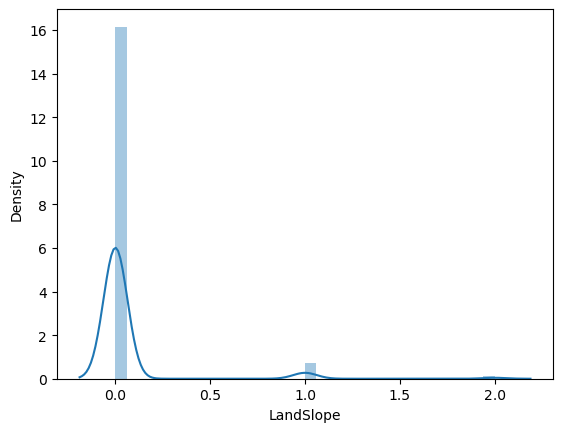

Skewness: -1.7943972988525658
count    1168.000000
mean        2.528253
std         0.692144
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: ExterQual, dtype: float64


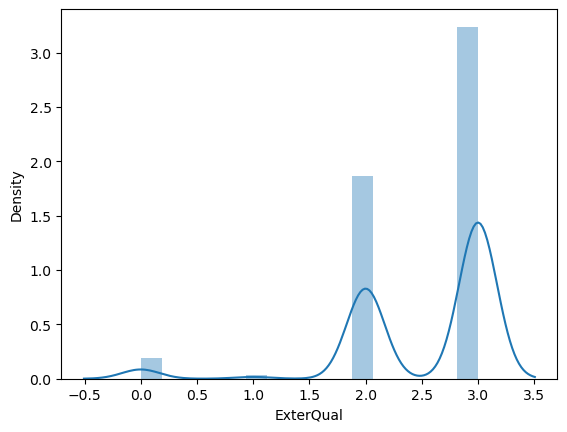

Skewness: -2.576726205792078
count    1168.000000
mean        3.738014
std         0.720511
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: ExterCond, dtype: float64


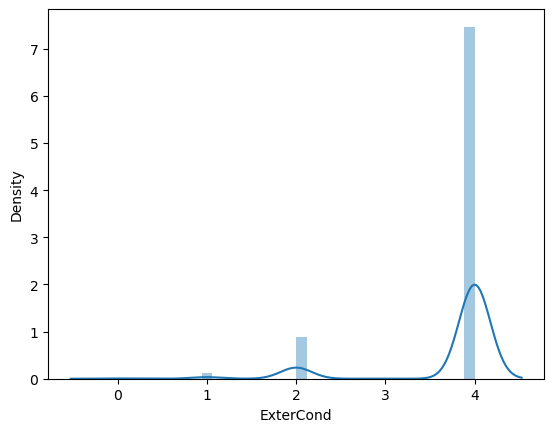

Skewness: -0.46118934909067105
count    1168.000000
mean        2.714041
std         1.261278
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         4.000000
Name: BsmtQual, dtype: float64


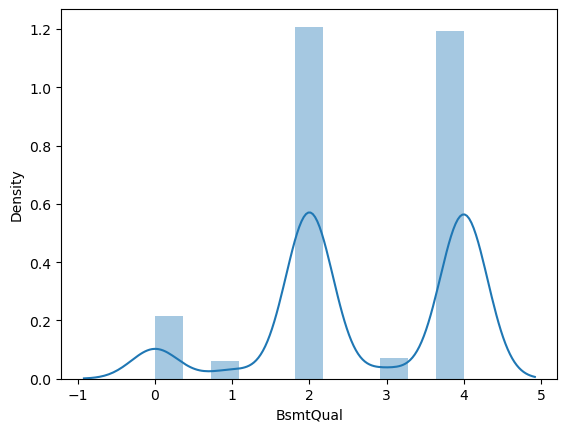

Skewness: 0
count    1168.0
mean        4.0
std         0.0
min         4.0
25%         4.0
50%         4.0
75%         4.0
max         4.0
Name: BsmtCond, dtype: float64


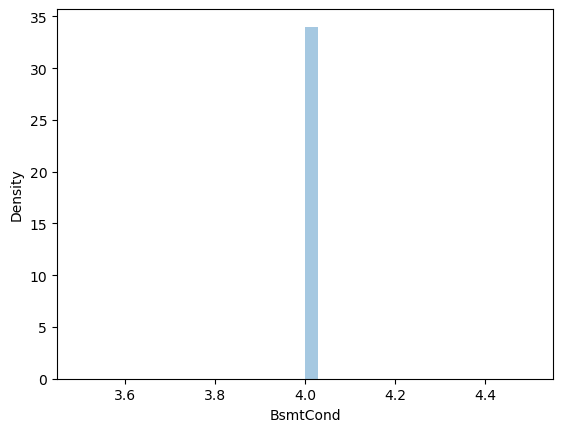

Skewness: -0.917775284804224
count    1168.000000
mean        2.889555
std         1.587427
min         0.000000
25%         1.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: BsmtExposure, dtype: float64


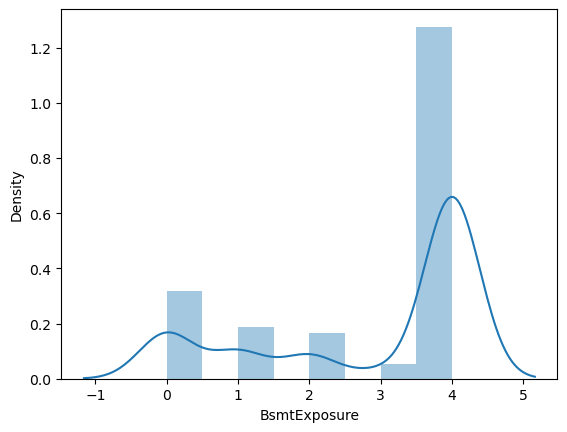

Skewness: 0.13717722075581987
count    1168.000000
mean        3.123288
std         2.243193
min         0.000000
25%         1.750000
50%         2.000000
75%         6.000000
max         6.000000
Name: BsmtFinType1, dtype: float64


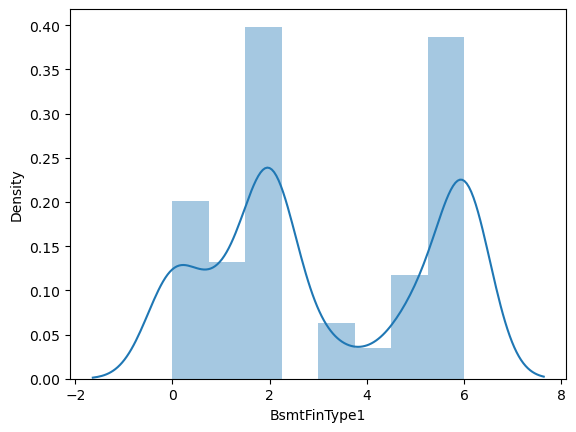

Skewness: -4.473332014940286
count    1168.000000
mean        1.859507
std         0.302367
min         0.000000
25%         1.945910
50%         1.945910
75%         1.945910
max         1.945910
Name: BsmtFinType2, dtype: float64


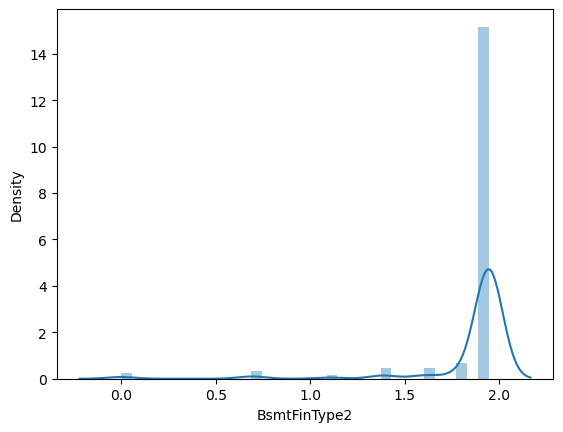

Skewness: 0.5032785107486933
count    1168.000000
mean        1.520548
std         1.747935
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max         4.000000
Name: HeatingQC, dtype: float64


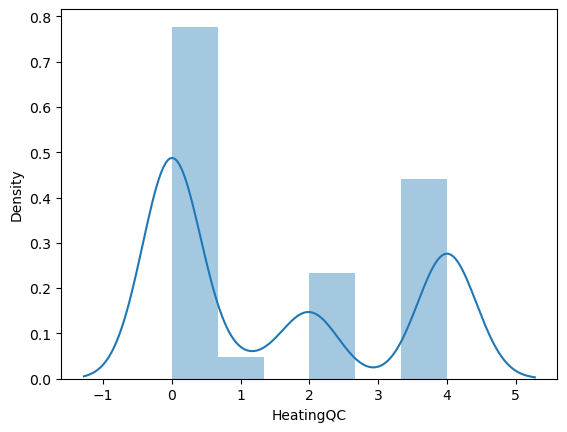

Skewness: -2.32997397235629
count    1168.000000
mean        1.154429
std         0.353787
min         0.000000
25%         1.098612
50%         1.098612
75%         1.386294
max         1.386294
Name: KitchenQual, dtype: float64


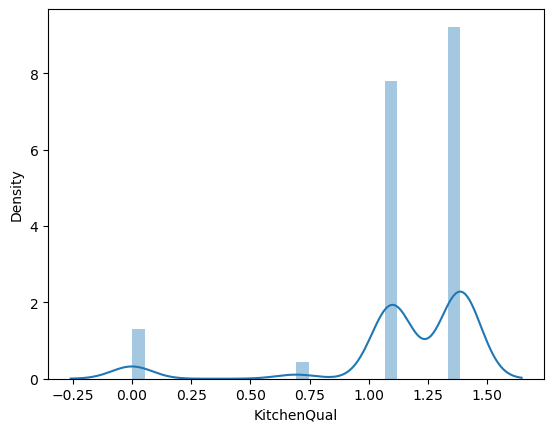

Skewness: 0
count    1168.0
mean        6.0
std         0.0
min         6.0
25%         6.0
50%         6.0
75%         6.0
max         6.0
Name: Functional, dtype: float64


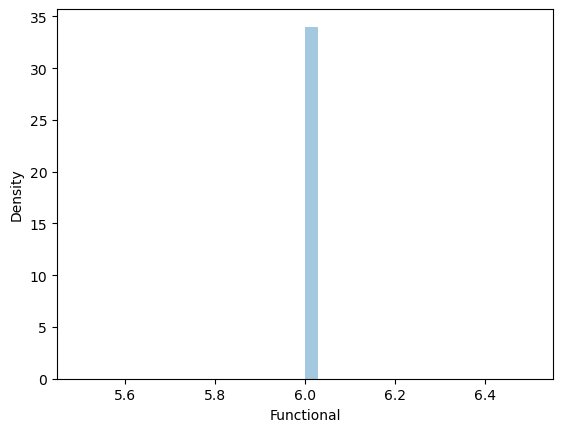

Skewness: 0.3108849260310347
count    1168.000000
mean        3.071918
std         1.169433
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: FireplaceQu, dtype: float64


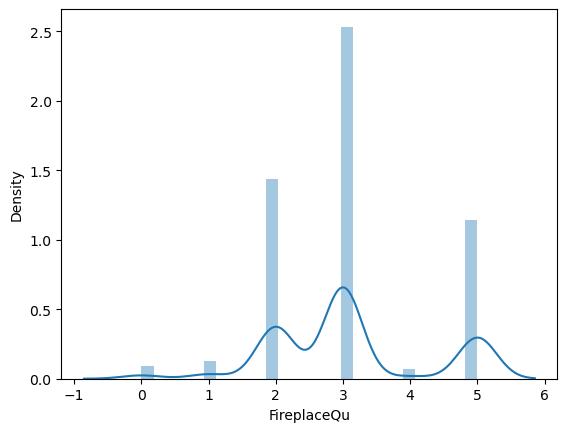

Skewness: -0.6077651864958665
count    1168.000000
mean        1.862158
std         1.186473
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: GarageFinish, dtype: float64


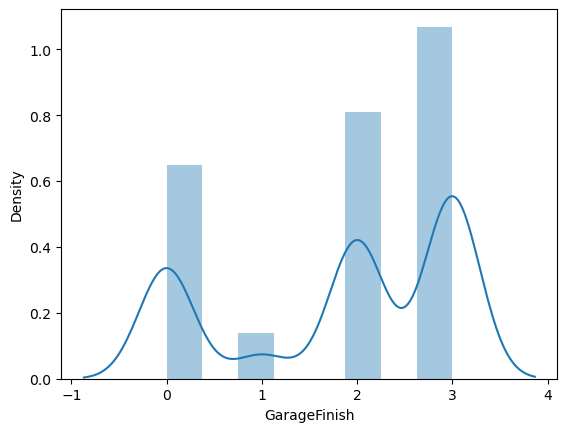

Skewness: -3.2317075777098654
count    1168.000000
mean        4.714041
std         0.906271
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: GarageQual, dtype: float64


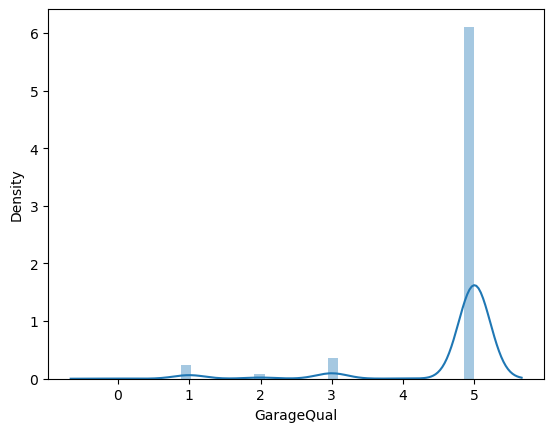

Skewness: -3.602124188093736
count    1168.000000
mean        4.767123
std         0.796661
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: GarageCond, dtype: float64


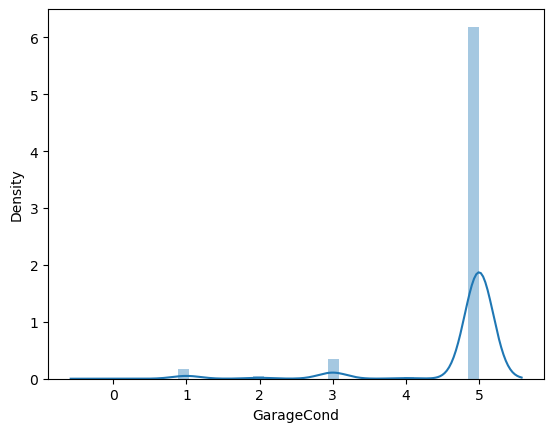

Skewness: -3.32135623442043
count    1168.000000
mean        1.857021
std         0.494288
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: PavedDrive, dtype: float64


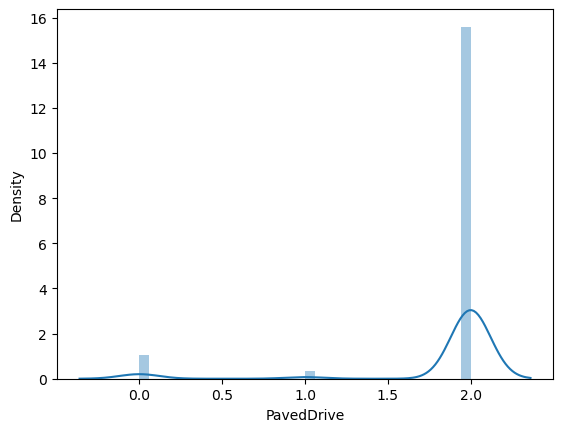

Skewness: -20.24664309046864
count    1168.000000
mean        2.993151
std         0.116891
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: PoolQC, dtype: float64


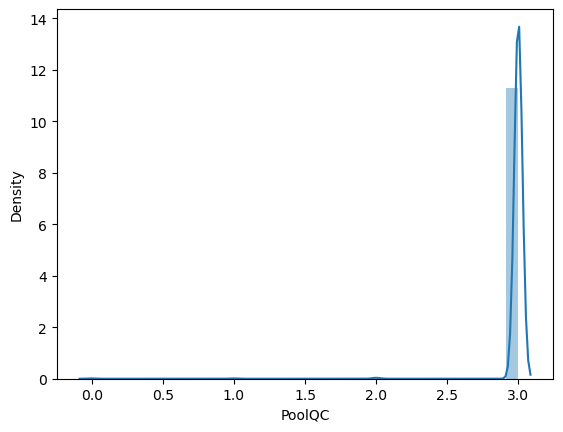

In [20]:
for col in od_num+od_cat:
    plt.tight_layout()
    sns.distplot(training[col])
    print("Skewness: "+str(training[col].skew()))
    print(training[col].describe())
    plt.show()

In [21]:
x_train=training.loc[:,training.columns!='SalePrice']
y_train=training['SalePrice']
x_valid=validation.loc[:,validation.columns!='SalePrice']
y_valid=validation['SalePrice']

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(x_train, np.log(y_train/100000))
y_pred=regressor.predict(x_valid)
print('Mean Absolute Error:', metrics.mean_absolute_error(np.log(y_valid/100000), y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(np.log(y_valid/100000), y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_valid/100000), y_pred)))
print('R-squared Error:', metrics.r2_score(np.log(y_valid/100000), y_pred))
#Predit the sale price in test dataset and save as pdf for submissiom to kaggle competition
y_pred=regressor.predict(test_data)
print(y_pred)
my_submission = pd.DataFrame({'Id': test_data.index, 'SalePrice': 100000*np.exp(y_pred)})
my_submission.to_csv('reg_submission.csv', index=False)

Mean Absolute Error: 0.08835466502352037
Mean Squared Error: 0.01700540547479831
Root Mean Squared Error: 0.13040477550610755
R-squared Error: 0.9020175498441214
[0.30338182 0.58156836 0.62052788 ... 0.56592167 0.16380311 0.77298335]


In [23]:
from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor(random_state=42)
rand.fit(x_train, np.log(y_train/100000))
rand.feature_importances_

array([4.55936081e-03, 8.56810061e-03, 1.87937058e-03, 0.00000000e+00,
       3.60773191e-04, 4.00041657e-01, 1.07180159e-02, 1.63064011e-03,
       3.62955175e-03, 9.34449569e-04, 3.98044661e-03, 0.00000000e+00,
       1.50188529e-03, 3.66115157e-03, 9.58214658e-03, 1.83093644e-04,
       2.87349624e-04, 7.05900711e-03, 5.11224999e-03, 1.07078931e-03,
       1.25415857e-02, 8.86486922e-03, 3.00845498e-03, 3.94767015e-05,
       1.50693902e-02, 3.49611911e-04, 2.20444120e-04, 2.07015558e-04,
       3.85329318e-04, 5.50440452e-04, 0.00000000e+00, 4.83907680e-03,
       1.28313574e-03, 0.00000000e+00, 1.79836253e-03, 1.14106491e-03,
       3.62691260e-03, 1.59735815e-02, 1.24505850e-02, 1.48081451e-03,
       3.24784477e-04, 6.69819340e-04, 1.69981459e-03, 2.98580011e-03,
       7.17341437e-04, 1.44736129e-04, 5.88200431e-04, 1.66359895e-04,
       3.33869465e-04, 2.11647769e-04, 3.57766624e-03, 2.87041846e-01,
       6.65493582e-03, 7.43500341e-04, 1.91809985e-03, 7.54471200e-03,
      

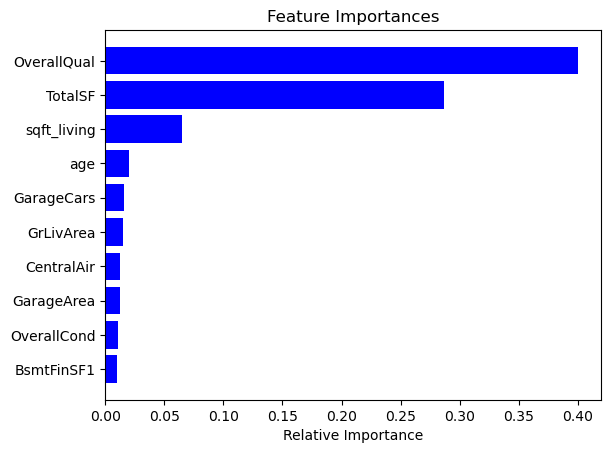

In [24]:
features = training.loc[:,training.columns!='SalePrice'].columns
importances = rand.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [25]:
regressor = LinearRegression()
regressor.fit(x_train[[features[i] for i in indices]], np.log(y_train/100000))
y_pred=regressor.predict(x_valid[[features[i] for i in indices]])
print('Mean Absolute Error:', metrics.mean_absolute_error(np.log(y_valid/100000), y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(np.log(y_valid/100000), y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_valid/100000), y_pred)))
print('R-squared Error:', metrics.r2_score(np.log(y_valid/100000), y_pred))
#Predit the sale price in test dataset and save as pdf for submissiom to kaggle competition
y_pred=regressor.predict(test_data[[features[i] for i in indices]])
print(y_pred)
my_submission = pd.DataFrame({'Id': test_data.index, 'SalePrice': 100000*np.exp(y_pred)})
my_submission.to_csv('reg_submission_improved.csv', index=False)

Mean Absolute Error: 0.1038109843621586
Mean Squared Error: 0.020846856801181597
Root Mean Squared Error: 0.1443844063643356
R-squared Error: 0.8798837163597394
[0.16621127 0.45870079 0.55709573 ... 0.4910317  0.14440537 0.90735906]


In [26]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, np.log(y_train/100000))
y_pred=lasso_reg.predict(x_valid)
print('Mean Absolute Error:', metrics.mean_absolute_error(np.log(y_valid/100000), y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(np.log(y_valid/100000), y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_valid/100000), y_pred)))
print('R-squared Error:', metrics.r2_score(np.log(y_valid/100000), y_pred))
#Predit the sale price in test dataset and save as pdf for submissiom to kaggle competition
y_pred=lasso_reg.predict(test_data)
print(y_pred)
my_submission = pd.DataFrame({'Id': test_data.index, 'SalePrice': 100000*np.exp(y_pred)})
my_submission.to_csv('lasso_submission.csv', index=False)

Mean Absolute Error: 0.0845712404023028
Mean Squared Error: 0.014786597262118985
Root Mean Squared Error: 0.12160015321585324
R-squared Error: 0.9148019709757724
[0.16433672 0.38203191 0.56556994 ... 0.56064922 0.206168   0.84864825]


In [27]:
selected_features = x_train.columns[lasso_reg.coef_ != 0]
selected_features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'HalfBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'TotalSF', 'Total_Bathrooms', 'Total_BathAbvGrd',
       'AvgRoomSize', 'Total_porch_sf', 'TotalLot', 'sqft_living', 'age',
       'MSSubClass_20', 'MSSubClass_70', 'MSSubClass_90', 'MSZoning_C (all)',
       'MSZoning_RM', 'Alley_Pave', 'LotConfig_CulDSac',
       'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt

In [28]:
x_train.shape

(1168, 246)

In [29]:
len(selected_features)

78

In [30]:
from sklearn.linear_model import Ridge
alpha = 0.001  # Regularization strength
ridge = Ridge(alpha=alpha)
ridge.fit(x_train, np.log(y_train/100000))

y_pred=ridge.predict(x_valid)
print('Mean Absolute Error:', metrics.mean_absolute_error(np.log(y_valid/100000), y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(np.log(y_valid/100000), y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_valid/100000), y_pred)))
print('R-squared Error:', metrics.r2_score(np.log(y_valid/100000), y_pred))
#Predit the sale price in test dataset and save as pdf for submissiom to kaggle competition
y_pred=ridge.predict(test_data)
print(y_pred)
my_submission = pd.DataFrame({'Id': test_data.index, 'SalePrice': 100000*np.exp(y_pred)})
my_submission.to_csv('ridge_submission.csv', index=False)

Mean Absolute Error: 0.08834444907463812
Mean Squared Error: 0.016998386168092863
Root Mean Squared Error: 0.1303778591943159
R-squared Error: 0.9020579939764541
[0.30326979 0.57984914 0.62047132 ... 0.56585872 0.16379706 0.7730631 ]
